# Seasonal Decomposition
Seasonal decomposition is the breakdown of time series data into their individual components, which usually consist of:
- Seasonality
- Irregularities
- Trends
- Cycles
- Random Error

The goal of the chapter is to understand the movement of the car sales without including economic data (this will be performed further).

#### Car Sales Data
The car sales dataset will be seasoanlly decomposed for:
- total_cars_sold
- new_cars_sold
- used_cars_sold
- total_value_cars_sold
- new_value_cars_sold
- used_cars_sold

#### Electric Vehicle Registration
- Plug in vehicles
- Electric vehicles
- Total electric vehicles

#### Import Packages

In [1]:
# import basic packages
import pandas as pd # for time series
import matplotlib.pyplot as plt # for plotting
import numpy as np # for mathematical functions

In [2]:
# seasonal decomposition packages
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# gridspec
import matplotlib.gridspec as gridspec

In [4]:
# evaluation techniques
from sklearn.metrics import mean_absolute_error

#### Import Data
Looking at the car sales dataset to download data

In [5]:
car_sales = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Automotive Industry/preprocessed_datasets/combined_data/car_sales.csv')
car_sales

date  total_cars_sold  new_cars_sold  used_cars_sold  \
0    2002-01-01            81033          31106           49927   
1    2002-02-01            78502          27520           50982   
2    2002-03-01            93019          34225           58794   
3    2002-04-01            96269          36452           59817   
4    2002-05-01            97936          37359           60577   
..          ...              ...            ...             ...   
259  2023-08-01            78601          25876           52725   
260  2023-09-01            69278          23892           45386   
261  2023-10-01            69248          23775           45473   
262  2023-11-01            64980          22720           42260   
263  2023-12-01            66566          26010           40556   

     total_value_cars_sold  new_value_cars_sold  used_value_cars_sold  \
0               1141497749            755015820             386481929   
1               1025807465            664454223             361353242   
2               1225051631            805666244             419385387   
3               1279429447            846368297             433061150   
4               1297575194            855005784             442569410   
..                     ...                  ...                   ...   
259             2131035952           1222581892             908454060   
260             1879114283           1134437699             744676584   
261             1863262680           1122680147             740582533   
262             1756655669           1062465105             694190564   
263             1907969542           1233234965             674734577   

     electric  plug-in_hybrid  total_electric_sales  real_value_cars_sold  \
0         NaN             NaN                   NaN          1.983277e+09   
1         NaN             NaN                   NaN          1.779269e+09   
2         NaN             NaN                   NaN          2.118907e+09   
3         NaN             NaN                   NaN          2.203088e+09   
4         NaN             NaN                   NaN          2.231844e+09   
..        ...             ...                   ...                   ...   
259   55728.0         25360.0               81088.0          2.148819e+09   
260   58157.0         26022.0               84179.0          1.888006e+09   
261   60136.0         26951.0               87087.0          1.870600e+09   
262   61557.0         27423.0               88980.0          1.760750e+09   
263   64587.0         28135.0               92722.0          1.907970e+09   

     real_new_value_cars_sold  real_used_value_cars_sold  \
0                1.311790e+09               6.714868e+08   
1                1.152500e+09               6.267692e+08   
2                1.393518e+09               7.253887e+08   
3                1.457387e+09               7.457009e+08   
4                1.470619e+09               7.612243e+08   
..                        ...                        ...   
259              1.232784e+09               9.160347e+08   
260              1.139806e+09               7.482002e+08   
261              1.127101e+09               7.434988e+08   
262              1.064942e+09               6.958087e+08   
263              1.233235e+09               6.747346e+08   

     real_average_price_cars_sold  real_new_average_price_cars_sold  \
0                    24474.928239                      24272.353244   
1                    22665.267267                      24144.412173   
2                    22779.291870                      23540.284704   
3                    22884.704298                      23218.706710   
4                    22788.798719                      22886.206376   
..                            ...                               ...   
259                  27338.310437                      47247.715721   
260                  27252.601416                      47481.906035   
261                  27013.052545           

#### Import Functions

##### Plotting Data
- Plot single dataframe
- Plot multiple series with multiple x values
- Plot multiple series with one x value
- Histogram
- Plot Confidence Intervals

In [6]:
# create a function for line time series
def line_series(x,y,title,xlabel,ylabel,grid=False):
    plt.figure(figsize=(12,8))
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(grid)
    plt.show()

In [7]:
# create a function that plots multiple lines
def plot_multiple_series_multiple_xvalues(xvalues,yvalues,labels,title,xlabel,ylabel,alpha=None):
    plt.figure(figsize=(14,8))
    for i in range(len(labels)):
        plt.plot(xvalues[i], yvalues[i], label=labels[i],alpha=alpha[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
from cycler import cycler
def plot_multiple_series_one_xvalues(xvalues, yvalues, labels, title, xlabel, ylabel, alpha=None):
    plt.figure(figsize=(14, 8))

    for i in range(len(labels)):
        plt.plot(xvalues, yvalues[i], label=labels[i], alpha=alpha[i] if alpha else 1.0)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
# Custom function to plot histogram
def plot_histogram(ax, data, bins,title,xlabel,ylabel):
    ax.hist(data, bins=bins, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [10]:
def plot_confidence_intervals(xvalues, upper_bound, lower_bound, title, xlabel, ylabel, original_data=None, optimal=None,show_original_data=True, show_optimal=True):
    """
    Plot data with confidence intervals and optionally with rolling average and optimal sine graph.

    Parameters:
    - xvalues: The x-axis data (e.g., dates).
    - upper_bound: Data for the upper bound of the confidence interval.
    - lower_bound: Data for the lower bound of the confidence interval.
    - original_data: Data for the rolling average plot 
    - optimal: Data for the optimal or middle function
    - show_original_data: Boolean to toggle the display of the rolling average plot.
    - show_sine_optimal: Boolean to toggle the display of the optimal sine graph plot.
    """
    # Create figure
    plt.figure(figsize=(12, 6))

    # Plot the relevant graphs
    if show_original_data and original_data is not None:
        plt.plot(xvalues, original_data, color='green', alpha=0.7, label='Rolling Average')
    
    if show_optimal and optimal is not None:
        plt.plot(xvalues, optimal, label='Optimal Sine Graph')
    
    plt.plot(xvalues, upper_bound, color='lightblue', linewidth=2)
    plt.plot(xvalues, lower_bound, color='lightblue', linewidth=2, label='Upper & Lower Bound')
    plt.fill_between(xvalues, lower_bound, upper_bound, color='lightblue', alpha=0.3)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

##### Seasonal Decomposition
- Additive seasonal decomposition
- Plot seasonal decomposition

In [11]:
def additive_seasonal_decomposition(data, period):
    
    decomposition = seasonal_decompose(data, model='additive', period=period)

    # Decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    return trend, seasonal, residual

In [12]:
def time_series_seasonal_analysis(data,data_name,data_label, date_start, date_end):
    """
    Plots total cars sold over the entire period and a specific sub-period.

    Parameters:
    - data: DataFrame with a DateTime index and a 'total_cars_sold' column.
    - data_name: The name of the series that is going to be analysed
    - data_label: The heading of the series (to be set as title)
    - date_start: Start date for the sub-period (string in 'YYYY-MM-DD' format).
    - date_end: End date for the sub-period (string in 'YYYY-MM-DD' format).
    """
    # Filter data for the specific sub-period
    total_cars_sold_period = data[(data.index > date_start) & (data.index < date_end)]

    # Create a figure and GridSpec layout
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1, 0], wspace=0.3)  # 2/3 and 1/3 width ratios

    # Create subplots
    ax1 = plt.subplot(gs[0])  # 2/3 width subplot
    ax2 = plt.subplot(gs[1])  # 1/3 width subplot

    # Plot the total cars sold on the left
    ax1.plot(data.index, data[data_name], linestyle='-')
    ax1.set_title(data_label)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(data)
    ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

    # Plot the total cars sold from the specified period on the right
    ax2.plot(total_cars_sold_period.index, total_cars_sold_period[data_name], linestyle='-', color='orange')
    ax2.set_title(f'{data_label} from {date_start} - {date_end}')
    ax2.set_xlabel(data)
    ax2.set_ylabel('Value')
    ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

    # Adjust layout
    plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition_analysis(time_series_data,title,period=12):
    # Decompose the data
    decomposition = seasonal_decompose(time_series_data, period=period)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Create subplots
    fig = plt.figure(figsize=(14, 8))
    fig.suptitle(f'Seasonal Decomposition Analysis of {title}', fontsize=18)
    gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[3, 3, 3], wspace=0.2, hspace=0.4)

    # Left subplot: Seasonal decomposition components
    ax1_1 = plt.subplot(gs[0, 0])
    ax1_1.plot(trend, label='Trend')
    ax1_1.set_title('Cyclical/Trend Component')
    ax1_1.legend()

    ax1_2 = plt.subplot(gs[1, 0])
    ax1_2.plot(seasonal, label='Seasonal')
    ax1_2.set_title('Seasonal Component')
    ax1_2.legend()

    ax1_3 = plt.subplot(gs[2, 0])
    ax1_3.plot(residual, label='Residual')
    ax1_3.set_title('Residual Component')
    ax1_3.legend()

    # Create least squares for trend
    x_trend_least_squares = np.arange(len(trend)).reshape(-1, 1)
    y_trend_least_squares = trend

    # Removing NaN values
    mask = ~np.isnan(y_trend_least_squares)
    x_trend_least_squares = x_trend_least_squares[mask]
    y_trend_least_squares = y_trend_least_squares[mask]

    model = LinearRegression()
    model.fit(x_trend_least_squares, y_trend_least_squares)
    y_pred = model.predict(x_trend_least_squares)

    # Extracting the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    # Print the equation of the linear regression line
    print('Linear Regression')
    print(f'Slope: {slope}')
    print(f'Intercept: {intercept}')

    # Plotting the linear regression of trend component
    ax2_1 = plt.subplot(gs[0, 1])
    ax2_1.plot(x_trend_least_squares, y_trend_least_squares, label='Original Data', color='Blue')
    ax2_1.plot(x_trend_least_squares, y_pred, label='Linear Regression', color='Red')
    ax2_1.legend()
    ax2_1.set_title('Linear Regression of Trend Component')

    ax2_2 = plt.subplot(gs[1, 1])
    seasonal_value = seasonal[:period]
    ax2_2.plot(np.arange(period), seasonal_value, label='Seasonal Values', color='Red')
    ax2_2.set_xticks(np.arange(period))
    ax2_2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=60)
    ax2_2.set_title('One Cycle of Seasonal Values')
    ax2_2.legend()

    ax2_3 = plt.subplot(gs[2, 1])
    ax2_3.hist(residual.dropna(), bins=10, color='Red')
    ax2_3.set_title('Histogram of Residuals')

    plt.show()

##### Transform Dataframe
- Convert long sales data into wide
- Turn wide data into long data
- Return irregular removed data
- Normalise Data

In [14]:
#When dealing with monthly values it can be useful to split it up into months of the year with days within them
#Create list of months
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

def create_monthly_data(df,value_column,incrementing_month,startyear,endyear):

    original_copy = df.copy()
    original_copy['Incrementing Month'] = range(0,len(original_copy))
    original_copy.set_index(incrementing_month,inplace=True)

    #Determine the number of years
    num_years = (len(df)+11) // 12

    #Create a new dataframe where the index is the number of years and the columns are the number of months
    monthly_data = pd.DataFrame(index=range(num_years),columns = months)

    #Fill the empty dataframe
    for i, row in original_copy.iterrows():
        year = (i) // 12
        month = months[(i) % 12]
        monthly_data.at[year,month] = row[value_column]

    
    date_range = pd.date_range(start=startyear, end=endyear, freq='M')
    years = date_range.year.unique()

    monthly_data.index=years

    return monthly_data

# example case 
# create_monthly_data(total_cars_sold,'total_cars_sold',np.arange(len(total_cars_sold)),'2002','2024')

In [15]:
def convert_to_long_format(df, start_date, end_date,col_name, freq='Q'):
    """
    Converts a wide-format DataFrame to a long-format DataFrame with a DateTime index.

    Parameters:
    - df (pd.DataFrame): The input DataFrame with years or periods as rows and quarters, months, weeks, or days as columns.
    - start_date (str): The start date for the DateTime index.
    - end_date (str): The end date for the DateTime index.
    - freq (str): The frequency for the DateTime index. Options are 'D' (day), 'M' (month), 'W' (week), 'Q' (quarter).

    Returns:
    - pd.DataFrame: A long-format DataFrame with a DateTime index.
    """
    long_data = []
    for index, row in df.iterrows():
        for period in df.columns:
            long_data.append(row[period])

    long_df = pd.DataFrame({col_name: long_data})

    # Adjust the DateTime index based on the frequency
    if freq == 'D':
        long_df.set_index(pd.date_range(start=start_date, end=end_date, freq='D'), inplace=True)
    elif freq == 'M':
        long_df.set_index(pd.date_range(start=start_date, end=end_date, freq='M'), inplace=True)
    elif freq == 'W':
        long_df.set_index(pd.date_range(start=start_date, end=end_date, freq='W'), inplace=True)
    elif freq == 'Q':
        long_df.set_index(pd.date_range(start=start_date, end=end_date, freq='Q'), inplace=True)
    else:
        raise ValueError("Frequency not recognized. Use 'D' for day, 'M' for month, 'W' for week, or 'Q' for quarter.")
    
    long_df.index = long_df.index - pd.offsets.MonthEnd(1) + pd.DateOffset(days=1)
        
    return long_df

In [16]:
import math

def remove_irregularities(data, zscore_data, mean_data, threshold=2):
    """
    Remove irregularities in data based on z-scores.
    
    Parameters:
    - data (pd.DataFrame): DataFrame with the original data.
    - zscore_data (pd.DataFrame): DataFrame with z-scores for the data.
    - mean_data (pd.Series): Series with mean values for each column.
    - threshold (float): Threshold for identifying high z-scores (default is 2).
    
    Returns:
    - pd.DataFrame: DataFrame with irregularities removed.
    - list: List of expected values and their positions.
    """
    # Create a copy of the original data frame
    data_irregularities_removed = data.copy()

    # Create mean data for each row
    row_mean = data.mean(axis=1)

    # Create an array of values
    expected_values = []

    # Iterate over the data where the z-score exceeds the threshold
    for index, row in data_irregularities_removed.iterrows():
        for col in data_irregularities_removed.columns:
            if abs(zscore_data.loc[index, col]) > threshold:
                found_value = data_irregularities_removed.loc[index, col]
                replacement_value = math.ceil(mean_data[col]) + math.ceil(row_mean[index])
                
                print(f"Found: {found_value} at ({index}, {col}), Replacing with: {replacement_value}")
                
                data_irregularities_removed.loc[index, col] = replacement_value
                expected_values.append((mean_data[col] + row_mean[index], (col, index)))
    
    return data_irregularities_removed, expected_values

In [17]:
def normalize_data(df_series):

    # Find minimum and maximum values in the specified column
    min_val = df_series.min()
    max_val = df_series.max()

    # Normalize the specified column
    normalized_series = (df_series - min_val) / (max_val - min_val)

    return normalized_series


##### Fitting Data
- Savgol Smooth
- Linear Regression
- Curve Fitting
- ADF Test
- Deseasonalise Data

In [18]:
# create smoothed data

from scipy.signal import savgol_filter

def savgol_smooth(y, window_length, polyorder):
    return savgol_filter(y, window_length, polyorder)

In [19]:
#Create a function for a least squares line

#Import the neccessary packages
from sklearn.linear_model import LinearRegression

def least_squares_line(incrementing_value,y_value,title,xlabel,ylabel):
    plt.figure(figsize=(12,8))

    #Create the x and y values for the least squares lines
    x_trend_least_squares = incrementing_value.values.reshape(-1,1).astype(float)
    y_trend_least_squares = y_value.astype(float) 

    #Train the model using linear regression packagage
    model = LinearRegression()

    #Fit the model to the x and y values
    model.fit(x_trend_least_squares,y_trend_least_squares)

    #Create the y values for the least squares
    y_pred = model.predict(x_trend_least_squares)

    plt.scatter(x_trend_least_squares, y_trend_least_squares, label='original data', color='blue')
    plt.plot(x_trend_least_squares, y_pred, label='least squares', color='red')

    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    #Get the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept


In [20]:
from scipy.optimize import curve_fit

def fit_curve(function, x_data, y_data, initial_guess_params):
    """
    Fit a curve to the given data using the specified function.

    Parameters:
    - function: Callable, the model function to fit.
    - x_data: array-like, the independent variable data.
    - y_data: array-like, the dependent variable data.
    - initial_guess_params: array-like, initial guesses for the function parameters.

    Returns:
    - popt: list, the optimal values for the parameters.
    - pcov: 2D array, the estimated covariance of popt.
    """
    popt, pcov = curve_fit(function, x_data, y_data, p0=initial_guess_params)
    return popt.tolist(), pcov

In [21]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts
def adf_test(data):
    """Using the ADF test to determine if a series is stationary"""
    test_results = adfuller(data)
    print('ADF Statistic: ',test_results[0])
    print('P-Value: ',test_results[1])
    print('Critical Value: ',)
    for thres,adf_stat in test_results[4].items():
       print('\t%s: %.2f' % (thres,adf_stat))

In [22]:
def deseasonalize_series(df, date_col, total_col, seasonal_values_dict):
    """
    Deseasonalizes a time series by removing seasonal values.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the time series data.
    - date_col (str): Name of the column with datetime values.
    - total_col (str): Name of the column with the total values to be deseasonalized.
    - seasonal_values_dict (dict): Dictionary with month names as keys and seasonal values as values.

    Returns:
    - pd.DataFrame: DataFrame with deseasonalized values and removed seasonality.
    """
    # Reset index and rename date column
    df.reset_index(inplace=True)
    df.rename(columns={'index': date_col}, inplace=True)

    # Convert date column to datetime if it's not already
    df[date_col] = pd.to_datetime(df[date_col])

    # Create month column and map seasonal values
    df['month'] = df[date_col].dt.month_name()
    df['seasonal_value'] = df['month'].map(seasonal_values_dict)

    # Calculate deseasonalized total values
    df[f'deseasonalised_{total_col}'] = df[total_col] - df['seasonal_value']

    # Drop unnecessary columns
    df.drop(columns={'month'}, inplace=True)
    
    return df

## Seasonal Decomposition of Total Cars Sold
Total cars sold is one of the most crucical dataset to follow as it reflects a number of things about the economy.
- Discretionary income : Only individuals who have funds saved and are earning incomes are able to purchase cars. Higher sales represent times of higher consumer confidence
- Economic health : Usual represent the overall economic health of the economy as when there are periods of downturns people cannot afford or are willing to purchase cars.

### Initial Seasonal Decomposition
Utilising packages to speed up the process, this is a great way of gaining an initial understanding of what the decomposition should look like. This is very important before continuing onto more advanced methods.

In [23]:
# get total cars sold as the data
total_cars_sold = car_sales[['date','total_cars_sold']].copy()
total_cars_sold['date'] = pd.to_datetime(total_cars_sold['date'])
total_cars_sold.set_index('date',inplace=True)
total_cars_sold

total_cars_sold
date                       
2002-01-01            81033
2002-02-01            78502
2002-03-01            93019
2002-04-01            96269
2002-05-01            97936
...                     ...
2023-08-01            78601
2023-09-01            69278
2023-10-01            69248
2023-11-01            64980
2023-12-01            66566

[264 rows x 1 columns]

#### Initial EDA
There is an initial analysis is important to understand the overall strucutre of the data:
- Time Series Inspection
- Using packages to Seasonally Decompose data

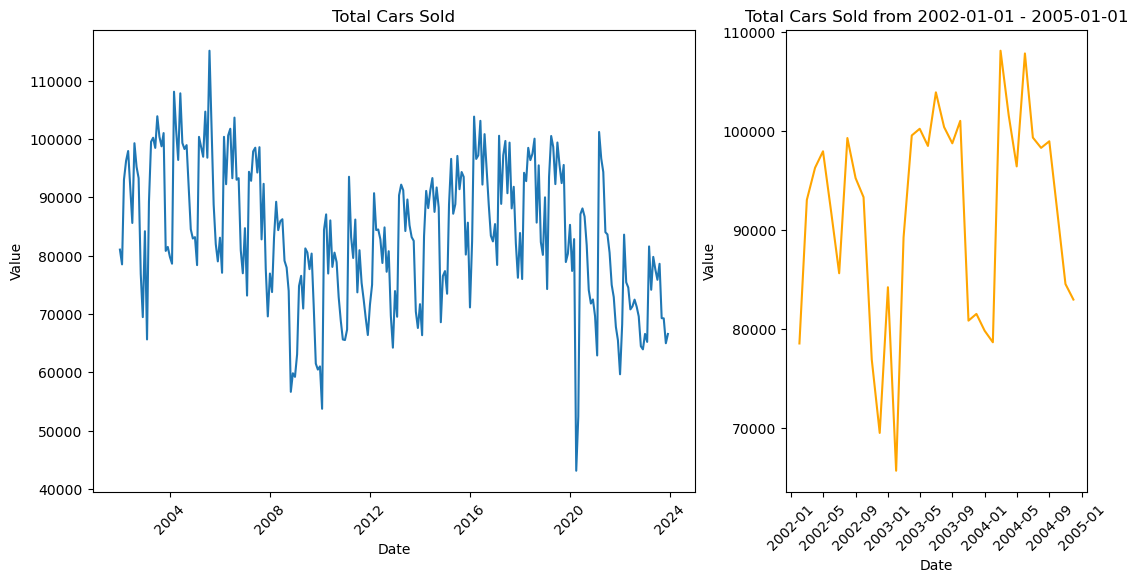

In [24]:
time_series_seasonal_analysis(total_cars_sold,'total_cars_sold','Total Cars Sold','2002-01-01','2005-01-01')

##### Initial observations : Total Cars Sold 2002-2024 (left)
- Irregularities : In 2020 there was a large irregularity in the number of cars sold, this is likely due to the shock economic factor of the Covid-19 Pandemic.
- Seasonality : There is a strong seasonality that is present, which is observed by the frequently occuring changes in cars sold each year.
- Cyclical : There is a downward and upward cyclical change that takes place over the years of data recorded.
- Trend : There seems to be a small decreasing trend in the number of cars sold.

##### Initial Observations : Total Cars Sold 2002-2005 (right)
- Seasonality : The seasonal pattern seems to be once every 12 periods which is a monthly basis.

Linear Regression
Slope: -39.07646353228154
Intercept: 88841.9297891511


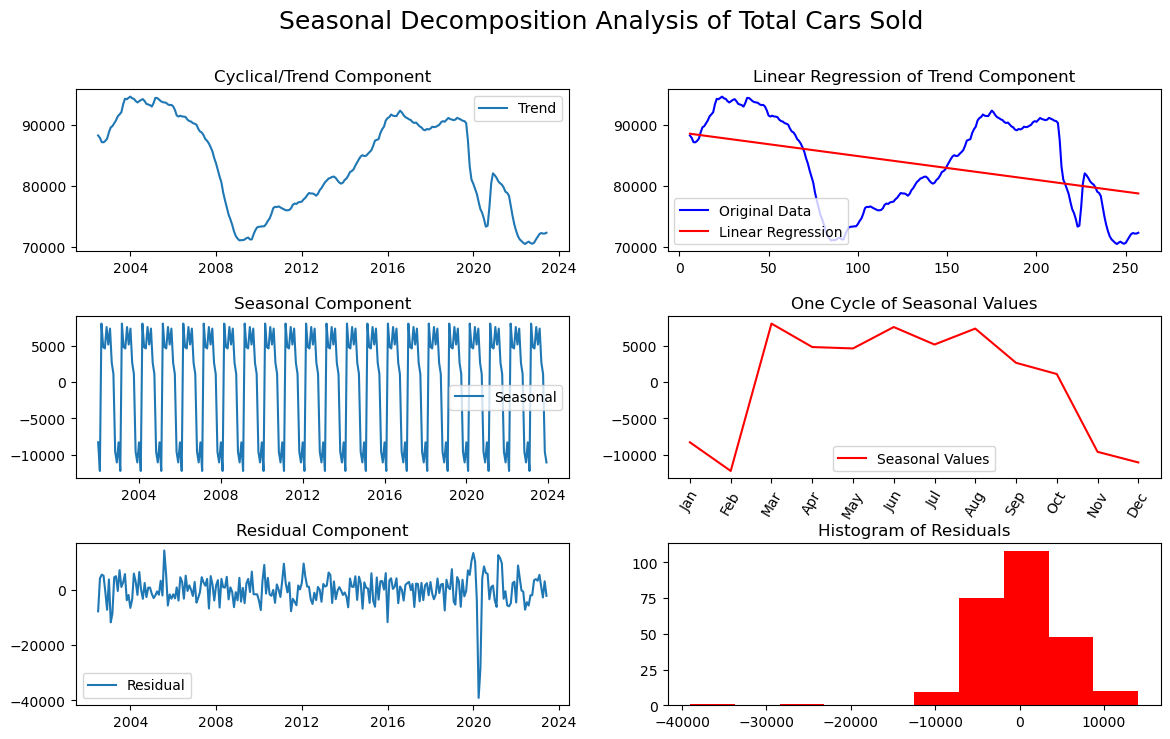

In [25]:
# using the periods found above do a seasonal decomposition of data
seasonal_decomposition_analysis(total_cars_sold,'Total Cars Sold',12)

This breakdown lists the fundamental information that is required to understand the data more indepth.

- Cyclical/Trend Component (Top Left) : The moving average with a window of 12 depicts two periods of stagnent growth with two downturns that take place over similar periods, suggesting that the movement can be modeled.

- Linear Regression of Trend Component (Top Right) : With a slope of -39 it suggests that with each month there are 39 less cars sold per month than the last

- Seasonal Component (Middle Left) : This is the repetition of the average number of cars sold per month relative to the average across the year

- One Cycle of Seasonal Values (Middle Right): This gives a detailed view of one seasonal differencing where Jan, Feb, Nov and Dec (cold months) seem to have the lowest amount of cars sold on average

- Residual Component (Bottom Left) : Displays the error which is left over after adding the seasonal component with the moving average. Highlights irregularities in 2005 and 2020 but also the stationarity component of the decomposition

- Histogram of Residuals : The data closely follows a normal distribution with a few more data points falling below the average which might suggest that the decreasing trend is actually incorrect and should not be included.


### In-depth Seasonal Decomposition
This seasonal decomposition is going to use the knowledge that has been gained from the initial seasonal decomposition to build a more concrete understanding of each component. This needs to be performed so that mathematical modeling using the data can be used.

1. Remove irregularities: The initial decomposition displayed just how much the irregularities were impacting the data. By looking at those with a zscore greater than 2, remove these before continuing onto the next stages of decomposition.
2. Find Seasonal Values
3. Model Cyclical Movement
4. Detrend Data

#### Irregularity Removal

In [26]:
# create a wide data format of cars sold
monthly_total_cars_sold = create_monthly_data(total_cars_sold,'total_cars_sold',np.arange(len(total_cars_sold)),'2002','2024')

# create zscores of original data
zscore_monthly_total_cars_sold = (monthly_total_cars_sold-monthly_total_cars_sold.mean()) / monthly_total_cars_sold.std()
zscore_monthly_total_cars_sold[abs(zscore_monthly_total_cars_sold)>2]

January February March    April       May      June July    August  \
2002     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2003     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2004     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2005     NaN      NaN   NaN      NaN       NaN       NaN  NaN  2.226313   
2006     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2007     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2008     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2009     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2010     NaN -2.57934   NaN      NaN       NaN       NaN  NaN       NaN   
2011     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2012     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2013     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2014     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2015     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2016     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2017     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2018     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2019     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2020     NaN      NaN   NaN -3.52638 -2.955159       NaN  NaN       NaN   
2021     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   
2022     NaN      NaN   NaN      NaN       NaN -2.123392  NaN       NaN   
2023     NaN      NaN   NaN      NaN       NaN       NaN  NaN       NaN   

     September October November December  
2002       NaN     NaN      NaN      NaN  
2003       NaN     NaN      NaN      NaN  
2004       NaN     NaN      NaN      NaN  
2005       NaN     NaN      NaN      NaN  
2006       NaN     NaN      NaN      NaN  
2007       NaN     NaN      NaN      NaN  
2008       NaN     NaN -2.13182      NaN  
2009       NaN     NaN      NaN      NaN  
2010       NaN     NaN      NaN      NaN  
2011       NaN     NaN      NaN      NaN  
2012       NaN     NaN      NaN      NaN  
2013       NaN     NaN      NaN      NaN  
2014       NaN     NaN      NaN      NaN  
2015       NaN     NaN      NaN      NaN  
2016       NaN     NaN      NaN      NaN  
2017       NaN     NaN      NaN      NaN  
2018       NaN     NaN      NaN      NaN  
2019       NaN     NaN      NaN      NaN  
2020       NaN     NaN      NaN      NaN  
2021       NaN     NaN      NaN      NaN  
2022       NaN     NaN      NaN      NaN  
2023       NaN     NaN      NaN      NaN

In [27]:
# create seasonal values
seasonal_values = monthly_total_cars_sold.mean() - total_cars_sold['total_cars_sold'].mean()

# remove irregularities
monthly_sales_data_irregularities_removed, expected_values = remove_irregularities(
    monthly_total_cars_sold, 
    zscore_monthly_total_cars_sold, 
    seasonal_values
)
monthly_sales_data_irregularities_removed

Found: 115136 at (2005, August), Replacing with: 101008
Found: 56645 at (2008, November), Replacing with: 67502
Found: 53741 at (2010, February), Replacing with: 62697
Found: 43120 at (2020, April), Replacing with: 80309
Found: 52407 at (2020, May), Replacing with: 80132
Found: 70783 at (2022, June), Replacing with: 77807


January February   March   April     May    June    July  August  \
2002   81033    78502   93019   96269   97936   91763   85602   99275   
2003   84188    65633   89218   99538  100214   98477  103899  100385   
2004   79788    78622  108106  101537   96408  107831   99323   98281   
2005   83171    78373  100365   98586   96956  104695   96794  101008   
2006   83076    77060  100372   92247  100611  101757   93273  103667   
2007   84707    73153   94375   92833   97875   98508   94250   98596   
2008   76929    73756   83096   89237   84374   85912   86243   79121   
2009   59217    63087   74792   76536   70930   81241   80529   77683   
2010   61007    62697   84430   87073   76931   86042   78070   80517   
2011   65531    67327   93524   83166   79599   86187   73703   80930   
2012   71590    74999   90706   84380   84486   82810   78739   84844   
2013   73926    69523   90346   92172   91217   84219   89624   85208   
2014   71679    66356   83333   91097   88153   91239   93300   87499   
2015   77354    73468   88774   96590   87189   88819   97099   91393   
2016   71120    82441  103838   96580   97184  103116   92181  100832   
2017   85410    78402  100555   88875   97227   99662   90703   99381   
2018   83883    75987   94202   92776   98482   96379   97459  100055   
2019   89997    74272   93507  100513   98638   92264   99398   95558   
2020   85281    77376   82836   80309   80132   87099   88095   86700   
2021   69608    62885  101204   96661   94339   84017   83638   80513   
2022   59657    68211   83601   75426   74535   77807   71296   72455   
2023   66580    65213   81580   74148   79788   77614   75862   78601   

     September October November December  
2002     95225   93296    76878    69455  
2003     98743  101014    80810    81491  
2004     98950   91885    84513    82941  
2005    101850   88759    81968    79016  
2006     93018   93279    80914    76976  
2007     82789   92313    77753    69581  
2008     77957   73943    67502    59831  
2009     80353   71500    61485    60464  
2010     78891   72914    68826    65625  
2011     75334   72493    69217    66386  
2012     77237   80760    69669    64220  
2013     83179   82539    70416    67595  
2014     91692   88264    68582    76491  
2015     94336   93506    80182    85654  
2016     94600   88760    83418    82439  
2017     88100   91803    82117    76205  
2018     85663   95482    82326    80131  
2019     92437   95548    78907    80328  
2020     81768   74105    71785    72488  
2021     74979   72888    67787    65489  
2022     71239   69580    64462    63931  
2023     69278   69248    64980    66566

The data values which had a z score greater than or less than 2 has been removed. Removing the irregularities as the first step for seasonal decomposition allows for a more general understanding but possibly less representative of what was found in the recorded data. This a suitable sacrifice with the goal of forecasting future data.

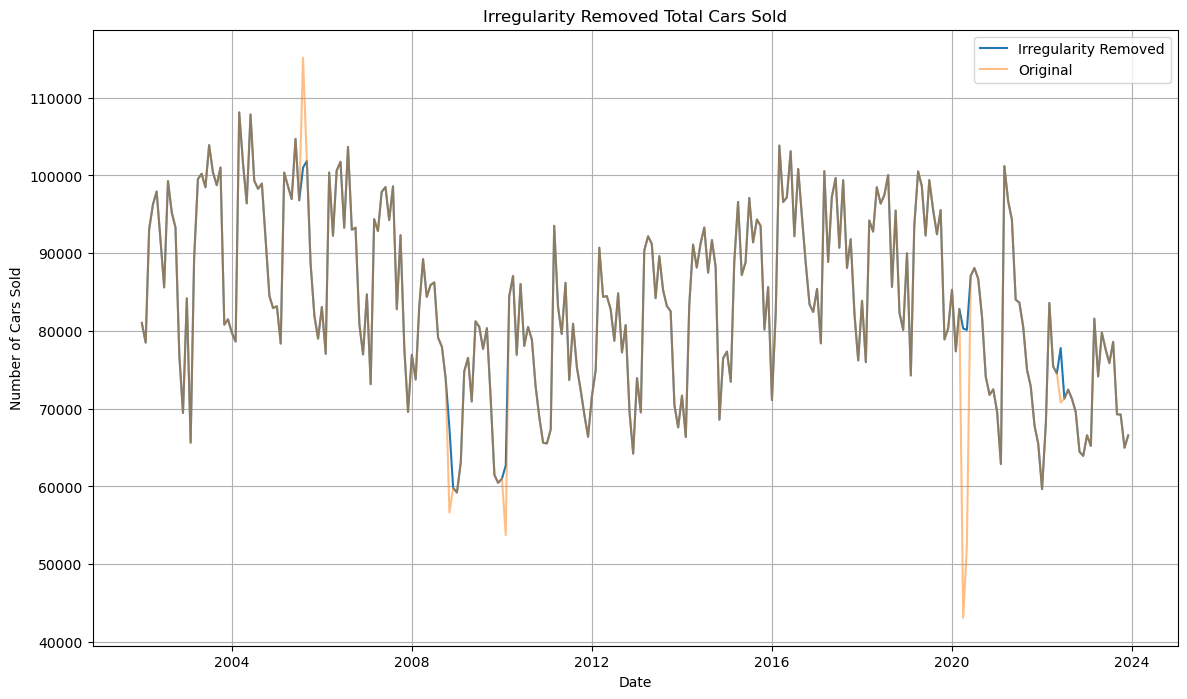

In [28]:
# plot the data before and after the removal of the irregularity 

# convert the wide data to long data
components_removed_total_cars_sold = convert_to_long_format(monthly_sales_data_irregularities_removed,'2002-01-01','2024-01-01','total_cars_sold','M')

# plot the two series comparison
plot_multiple_series_one_xvalues(total_cars_sold.index,
                                [components_removed_total_cars_sold['total_cars_sold'],total_cars_sold['total_cars_sold']],
                                ['Irregularity Removed','Original'],'Irregularity Removed Total Cars Sold','Date',
                                'Number of Cars Sold',[1,0.5])


#### Seasonality Understanding
Using the new data with irregularities removed, look at the seasonality

In [29]:
# look at the difference between the seasonal values after irregularities removed
monthly_sales_data_irregularities_removed.mean() - monthly_total_cars_sold.mean()

January         0.000000
February      407.090909
March           0.000000
April        1690.409091
May          1260.227273
June          319.272727
July            0.000000
August       -642.181818
September       0.000000
October         0.000000
November      493.500000
December        0.000000
dtype: float64

The new seasonal values are higher due to the removal of certain data values such as in April and May in 2020 where the number of cars sold were irregularly low.

January      -8178.636364
February    -11696.318182
March         7778.045455
April         6449.409091
May           5842.818182
June          7399.818182
July          4746.272727
August        6265.454545
September     1952.545455
October        418.954545
November     -9552.954545
December    -11425.409091
dtype: float64


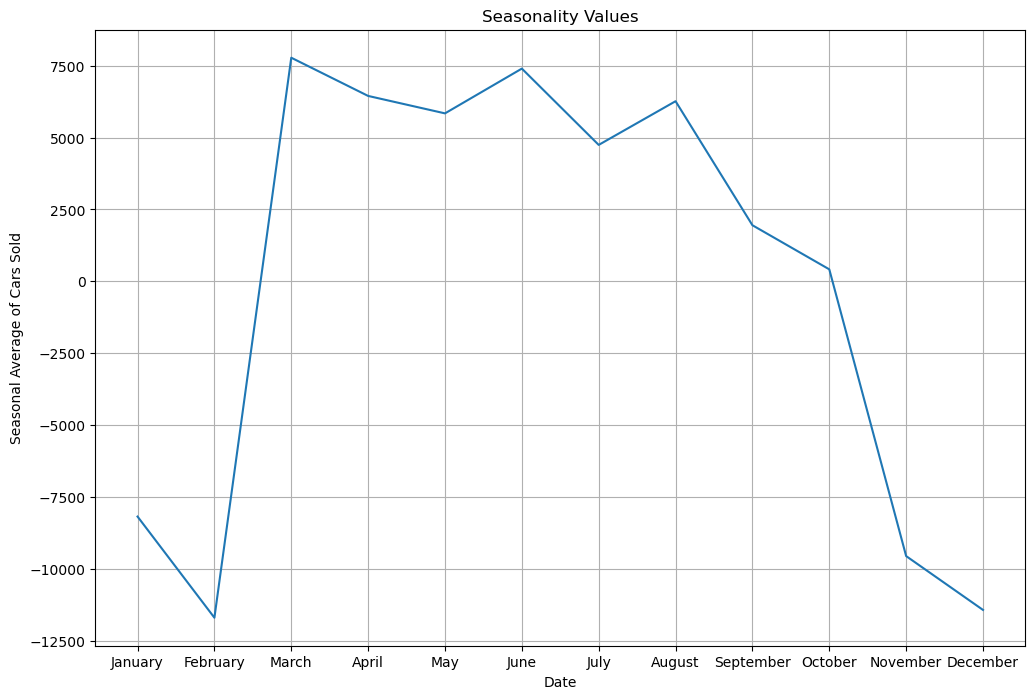

In [30]:
# print out the new seasonal values
seasonal_values_irregularity_removed = monthly_sales_data_irregularities_removed.mean() - components_removed_total_cars_sold['total_cars_sold'].mean()
print(seasonal_values_irregularity_removed)
line_series(seasonal_values_irregularity_removed.index,seasonal_values_irregularity_removed.values,
            'Seasonality Values','Date','Seasonal Average of Cars Sold',True)

In [31]:
deseasonalize_series(components_removed_total_cars_sold,'date','total_cars_sold',seasonal_values_irregularity_removed)

date  total_cars_sold  seasonal_value  \
0   2002-01-01            81033    -8178.636364   
1   2002-02-01            78502   -11696.318182   
2   2002-03-01            93019     7778.045455   
3   2002-04-01            96269     6449.409091   
4   2002-05-01            97936     5842.818182   
..         ...              ...             ...   
259 2023-08-01            78601     6265.454545   
260 2023-09-01            69278     1952.545455   
261 2023-10-01            69248      418.954545   
262 2023-11-01            64980    -9552.954545   
263 2023-12-01            66566   -11425.409091   

     deseasonalised_total_cars_sold  
0                      89211.636364  
1                      90198.318182  
2                      85240.954545  
3                      89819.590909  
4                      92093.181818  
..                              ...  
259                    72335.545455  
260                    67325.454545  
261                    68829.045455  
262                    74532.954545  
263                    77991.409091  

[264 rows x 4 columns]

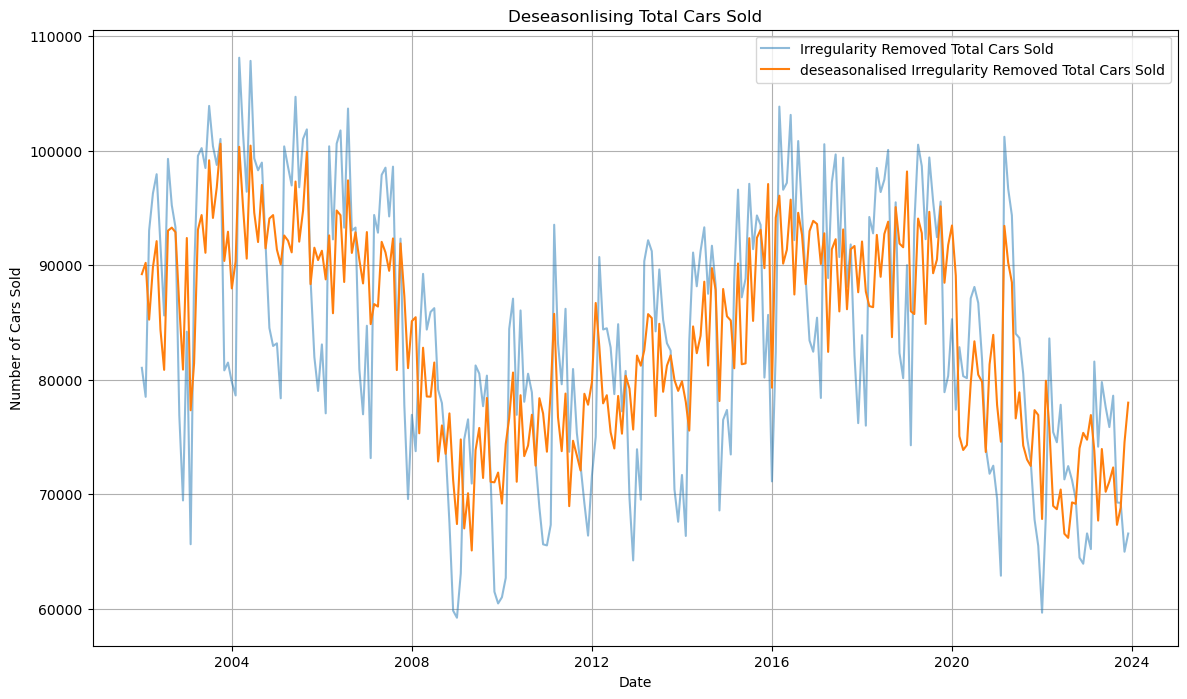

In [32]:
# plot the deseasonalised data
plot_multiple_series_one_xvalues(components_removed_total_cars_sold['date'],
                                 [components_removed_total_cars_sold['total_cars_sold'],
                                  components_removed_total_cars_sold['deseasonalised_total_cars_sold']],
                                  ['Irregularity Removed Total Cars Sold','deseasonalised Irregularity Removed Total Cars Sold'],
                                  'Deseasonlising Total Cars Sold','Date','Number of Cars Sold',[0.5,1])

##### Confidence Intervals of Seasonality

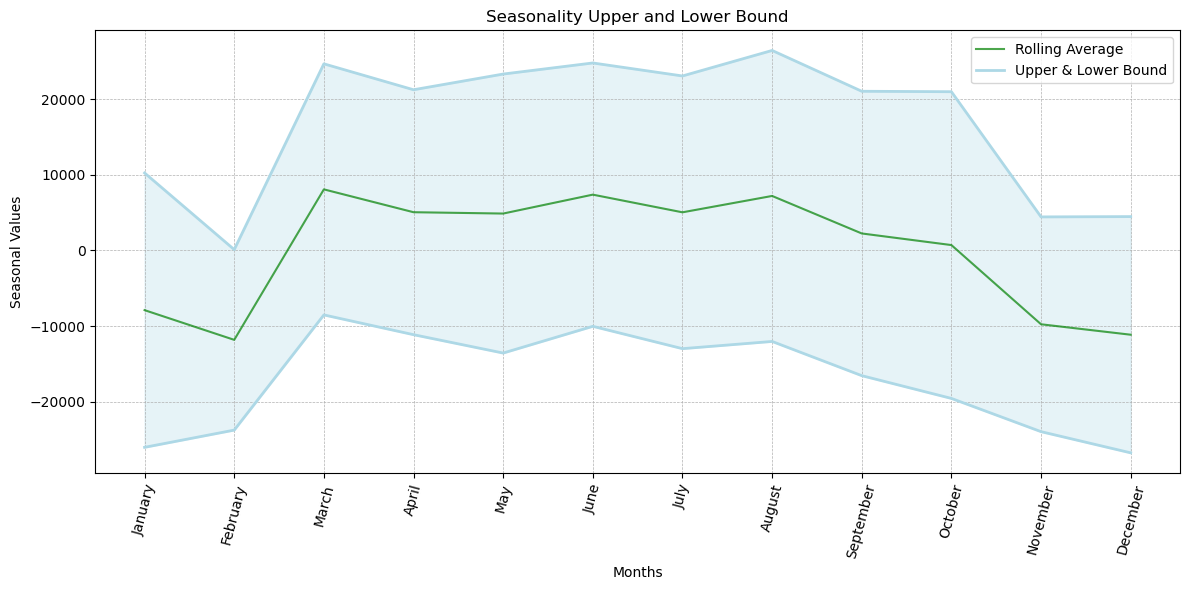

In [33]:
# create upper seasonal value
upper_seasonal_value = seasonal_values + (1.96 * monthly_sales_data_irregularities_removed.std())

# create lower seasonal value
lower_seasonal_value = seasonal_values - (1.96 * monthly_sales_data_irregularities_removed.std())

plot_confidence_intervals(months,upper_seasonal_value,lower_seasonal_value,
                          'Seasonality Upper and Lower Bound','Months','Seasonal Values',
                          seasonal_values,False,True,False)

#### Cyclical Understanding

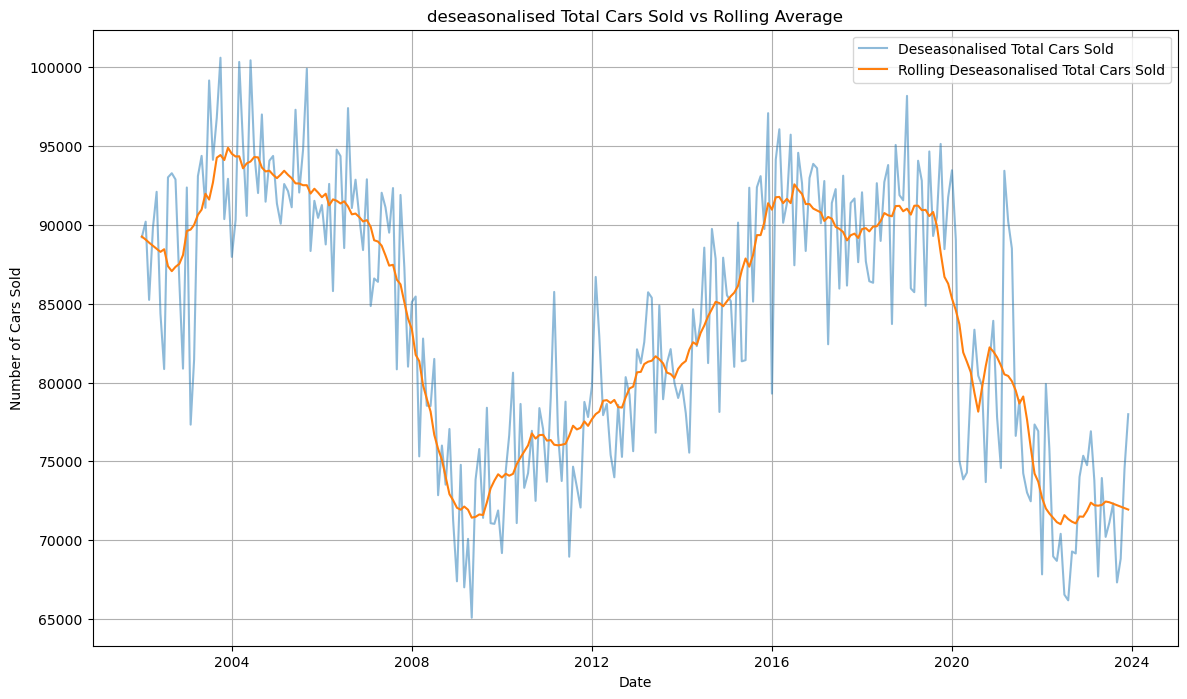

In [34]:
# create rolling average of deseasonalised data
# use savgol smooth function from above with a window of 12 (due to seasonality) and polyorder 1
total_cars_sold_rolling_average = savgol_smooth(components_removed_total_cars_sold['deseasonalised_total_cars_sold'],12,1)

# plot rolling average and deseasonalised data
plot_multiple_series_one_xvalues(components_removed_total_cars_sold['date'],
            [components_removed_total_cars_sold['deseasonalised_total_cars_sold'],
            total_cars_sold_rolling_average],
            ['Deseasonalised Total Cars Sold','Rolling Deseasonalised Total Cars Sold'],
            'deseasonalised Total Cars Sold vs Rolling Average',
            'Date','Number of Cars Sold',[0.5,1])

The movement of deseasonalised total cars sold sems to follow a consistient pattern over the past 22 years. It seems to look quite sinusoidal. The next step is to understand the parameters that make up that sinusoidal cycle.

##### Parameter Estimation
Using a sinusoidal function, model the total cars sold from 2002-2024 using estimation of parameters. 

In [35]:
from sympy import symbols, sin, pi
from sympy import init_printing

# Initialize pretty printing
init_printing()

# Define symbols
A,B,x,C,D = symbols('A,B,x,C,D')

# Define an expression
expr = A * sin(B * (x - C)) + D

# Display the expression
expr

- A : Amplitude - The peak deviation from the central value.

- T : Period - The number of intervals in between each sinsusoidal period of the graph

- B : Angular Frequency - Number of cycles a function completes per unit interval

- C : Phase Shift - Represents the horizontal shift of the function along the x axes

- D : Vertical Shift - Moves up or down the entire function

In [36]:
# sine function
def sine_function(x, A, B, C, D):
    return A * np.sin(B * (x - C)) + D

In [37]:
# amplitude can be found by getting the difference between max and min divided by 2
A = (total_cars_sold_rolling_average.max() - total_cars_sold_rolling_average.min())/2

# period is found by the years between the cycles (2016-2004 = 12)
T = 12 * 12 # times 12 to represent 12 lots of 12 months

# find angular frequency from period
B = (2 * np.pi) / T

# the sinusoidal graph needs to be shifted back 2 years
C = 2

# the vertical shift or the average of the function
D = total_cars_sold_rolling_average.mean()

In [38]:
# define x values
sine_x = np.arange(0,len(total_cars_sold_rolling_average))

# find y values
total_cars_sold_sine = sine_function(sine_x,A,B,C,D)

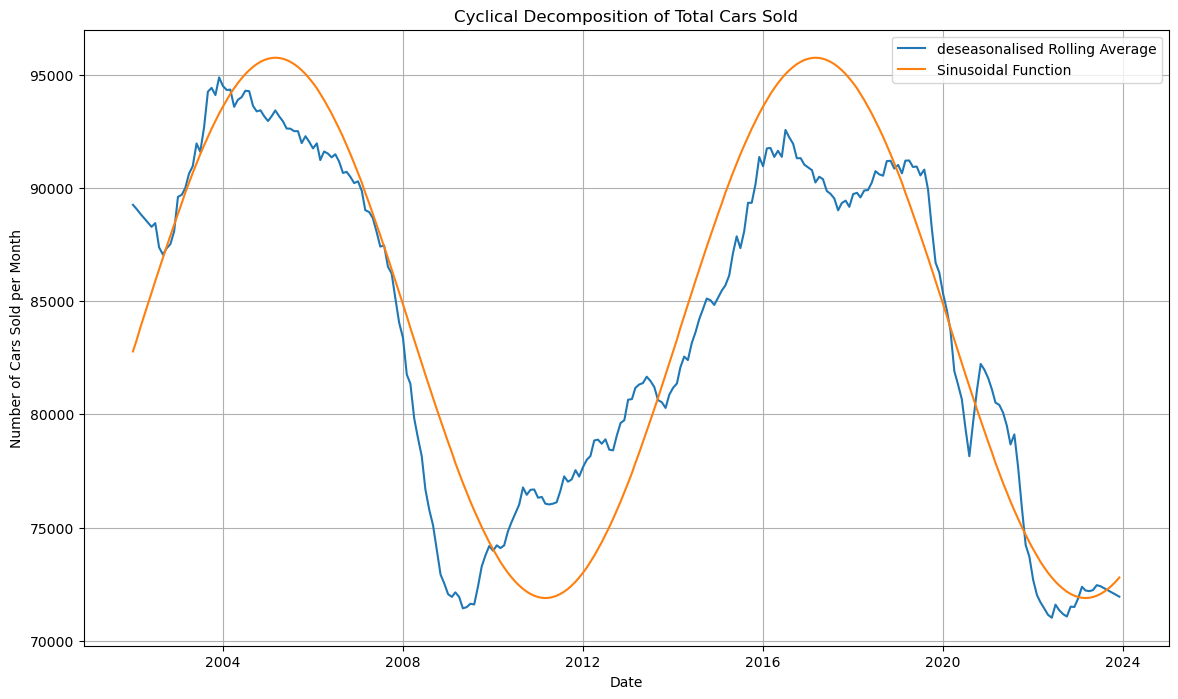

In [39]:
# plot multiple series
plot_multiple_series_one_xvalues(total_cars_sold.index,
                                 [total_cars_sold_rolling_average,total_cars_sold_sine],
                                 ['deseasonalised Rolling Average','Sinusoidal Function'],
                                 'Cyclical Decomposition of Total Cars Sold','Date',
                                 'Number of Cars Sold per Month')

In [40]:
# evaluation 
mae_sine_total_cars_sold = mean_absolute_error(total_cars_sold_sine,total_cars_sold_rolling_average)

print(f'Mean Absolute Error of Total Cars Sold: {mae_sine_total_cars_sold}')

Mean Absolute Error of Total Cars Sold: 2546.9275458839766


##### Parameter Optimisation
Using scipy.optimise find the optimal values of the parameters of the sinusoidal graph

In [41]:
# use the function created in functions under optimisation

# create initial guess list of parameters
initial_guess_sine_total_cars_sold = [A,B,C,D]

# fit the curve
popt,pcov = fit_curve(sine_function,sine_x,total_cars_sold_rolling_average,initial_guess_sine_total_cars_sold)

# create a list of string letters
param_letters = ['A','B','C','D']

# create a list of string names
param_names = ['Amplitude','Angular Frequency','Horizontal Shift','Vertical Shift']

# get standard deviation 
std_devs = np.sqrt(np.diag(pcov)).tolist()

# print out the relevant data
for param_letter,param_name,optimal_value,std_dev in zip(param_letters,param_names,popt,std_devs):
    print(f'{param_name} ({param_letter}) : {optimal_value:.4f} ± {std_dev:.4f}')

Amplitude (A) : 9861.4121 ± 196.5892
Angular Frequency (B) : 0.0416 ± 0.0003
Horizontal Shift (C) : -6.4306 ± 1.0623
Vertical Shift (D) : 83165.0948 ± 146.5875


The standard deviation is very small for ampltiude, angular frequency and vertical shift however the horizontal shift is quite large. The small standard deviation suggests that those values do not show high error across the model which is seen by the small differences. However the largest differences come in the optimisation of the timing of this model. That is because the movement in declines and recoveries are actually quite different, suggesting that it does not occur a constant basis and there are other factors that play into the reasoning for the changes in car sales besides cyclical patterns (this will be explored in the economic conditions chapter).

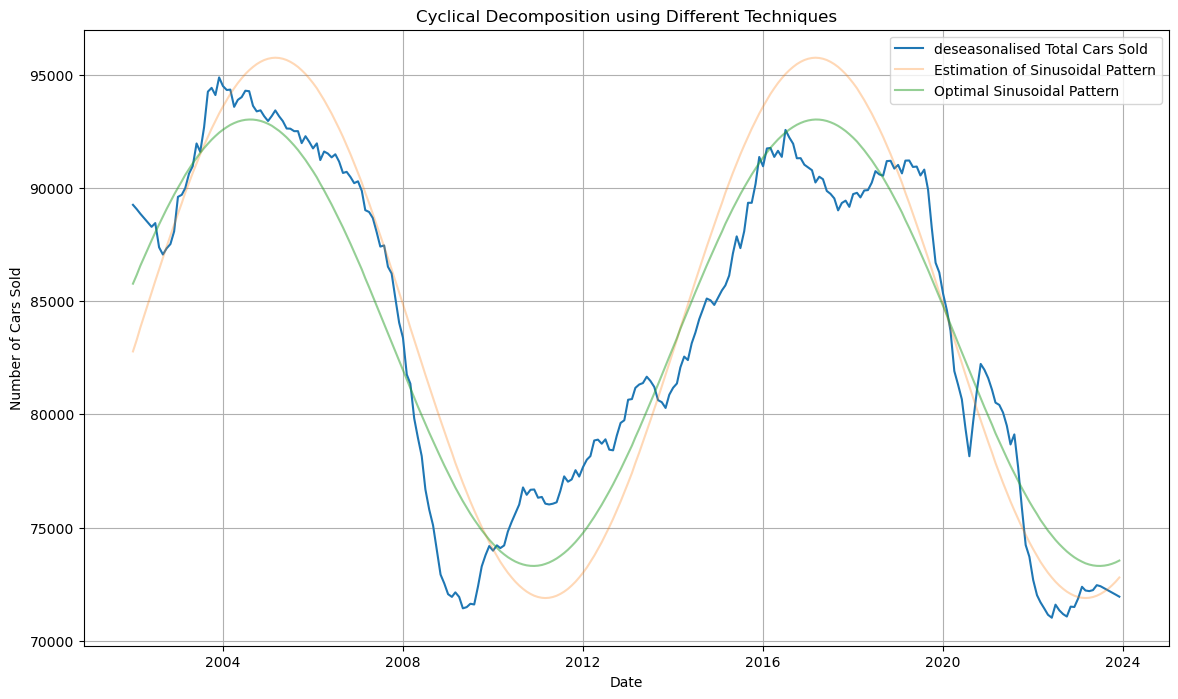

Parameter Estimation MAE: 2546.9275458839766
Parameter Optimisation MAE: 1946.1361513136428


In [42]:
# create new sine function
total_cars_sold_sine_optimal = sine_function(sine_x,*popt)

# plot the comparisons
plot_multiple_series_one_xvalues(total_cars_sold.index,
                                 [total_cars_sold_rolling_average,total_cars_sold_sine,total_cars_sold_sine_optimal],
                                 ['deseasonalised Total Cars Sold','Estimation of Sinusoidal Pattern','Optimal Sinusoidal Pattern'],
                                 'Cyclical Decomposition using Different Techniques','Date','Number of Cars Sold',
                                 [1,0.3,0.5])

# display two mean absolute error
mae_sine_optimal_total_cars_sold = mean_absolute_error(total_cars_sold_sine_optimal,total_cars_sold_rolling_average)

print(f'Parameter Estimation MAE: {mae_sine_total_cars_sold}')
print(f'Parameter Optimisation MAE: {mae_sine_optimal_total_cars_sold}')

There is a 20% improvement in the accuracy of the model through using optimisation techniques. This has accuretly depicted the model however it has likely led to overfitting. For more effective modeling use confidence intervals.

It is also important to note the difficulty in finding the trough for both the estimation and model optimisation. This suggests that the vertical shift suggests a complex system which has many influences on the pattern.

##### Defining Confidence Intervals for Model

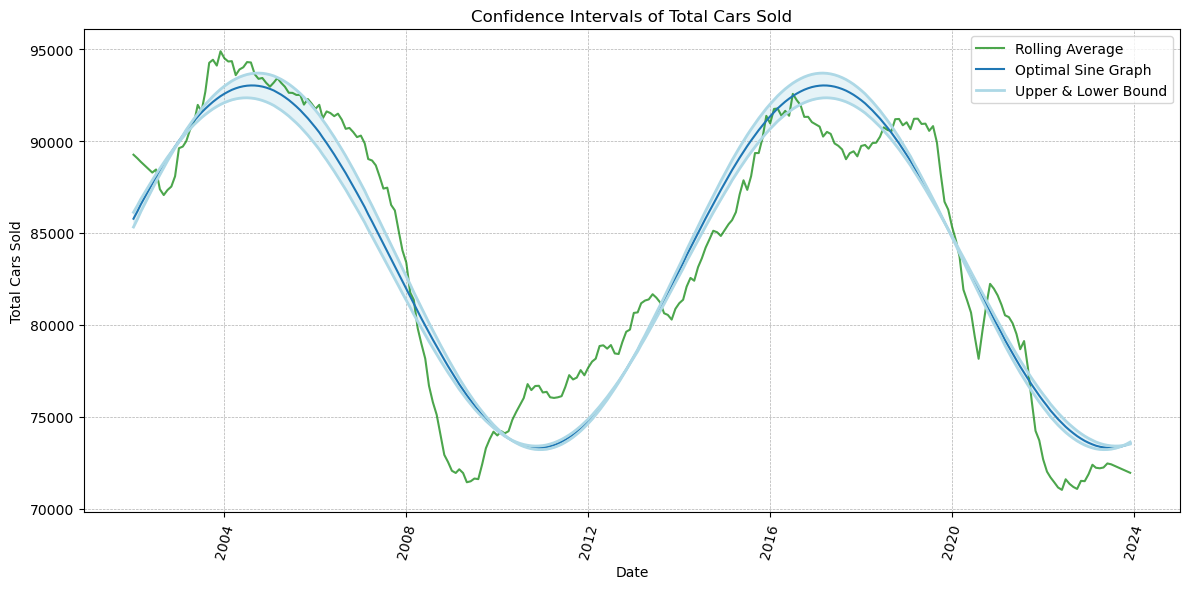

A (Amplitude):
  Optimal Value: 9861.41212474295
  Upper Bound: 10246.71991036392
  Lower Bound: 9476.104339121981

B (Angular Frequency):
  Optimal Value: 0.04162872372276663
  Upper Bound: 0.04219641337575745
  Lower Bound: 0.04106103406977581

C (Horizontal Shift):
  Optimal Value: -6.430599802650237
  Upper Bound: -4.348614255502506
  Lower Bound: -8.512585349797968

D (Vertical Shift):
  Optimal Value: 83165.09476278716
  Upper Bound: 83452.40091791896
  Lower Bound: 82877.78860765537



In [43]:
from scipy.stats import norm

# define parameter names
param_names = ['Amplitude','Angular Frequency','Horizontal Shift','Vertical Shift']

# define confidence level
confidence_level = 0.95
# calculate z-score for the given confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

# create a dictionary to store the upper and lower bound data
param_dict = {}

# store the data
for symbol, name, param, std in zip(param_letters, param_names, popt, std_devs):
    param_dict[symbol] = {
        'Parameter Name': name,
        'Optimal Value': param,
        'Upper Bound': param + (z_score * std),
        'Lower Bound': param - (z_score * std)
    }

# store upper and lower parameters
params_upper = []
params_lower = []
for letter in param_letters:
    params_upper.append(param_dict[letter]['Upper Bound'])

    params_lower.append(param_dict[letter]['Lower Bound'])

# create sine functions of stored parameters
upper_sine = sine_function(sine_x,*params_upper)
lower_sine = sine_function(sine_x,*params_lower)

plot_confidence_intervals(total_cars_sold.index,upper_sine,lower_sine,
                          'Confidence Intervals of Total Cars Sold','Date','Total Cars Sold',
                          total_cars_sold_rolling_average,total_cars_sold_sine_optimal,True,True)

# print out the relevant data that will be plotted
for symbol, details in param_dict.items():
    print(f"{symbol} ({details['Parameter Name']}):")
    print(f"  Optimal Value: {details['Optimal Value']}")
    print(f"  Upper Bound: {details['Upper Bound']}")
    print(f"  Lower Bound: {details['Lower Bound']}")
    print()

The confidence intervals have been created and added to contrast with the optimal sine graph. These confidence intervals can be utilised when forecasting into the future. However, they do show that the upper and lower bounds are relatively close together. The confidence intervals can be used for future forecasting as well.

##### Remove Optimal Cyclical Component from Data

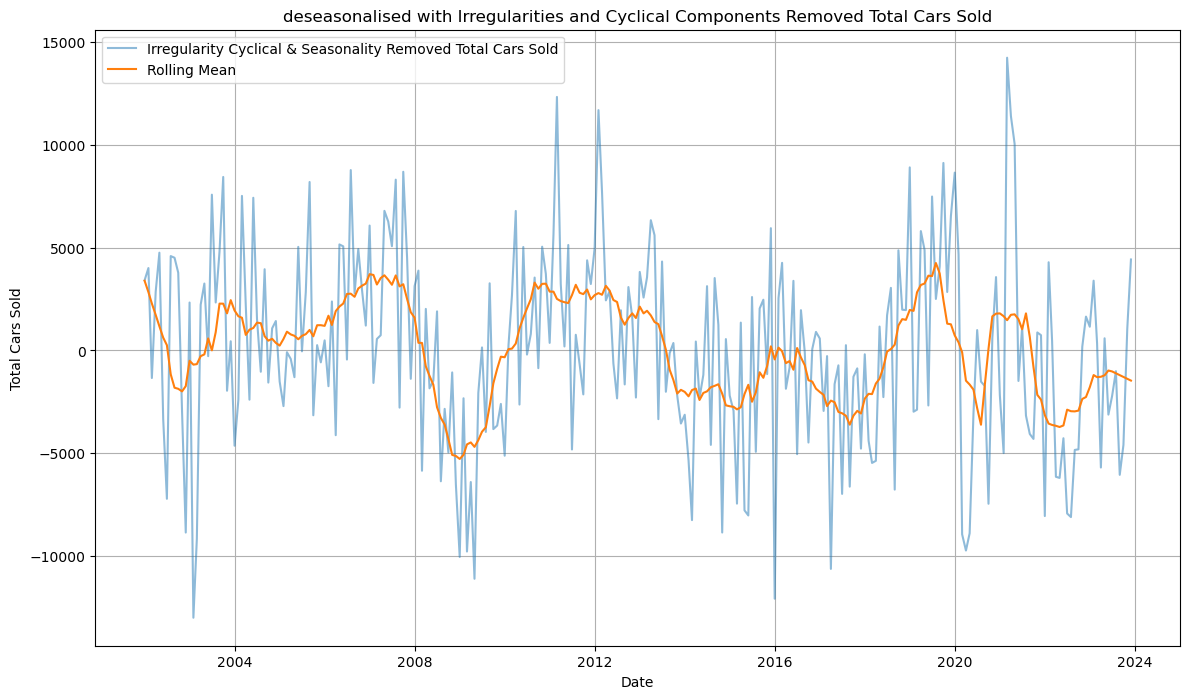

In [44]:
# assign a new column to the cyclical component 
components_removed_total_cars_sold['cyclical_component'] = total_cars_sold_sine_optimal - total_cars_sold_sine_optimal.mean()

# remove the cyclical component from the deseasonalised car sold
components_removed_total_cars_sold['cyclical_deseasonalised_total_cars_sold'] = components_removed_total_cars_sold['deseasonalised_total_cars_sold'] - components_removed_total_cars_sold['cyclical_component'] - components_removed_total_cars_sold['deseasonalised_total_cars_sold'].mean()

plot_multiple_series_one_xvalues(components_removed_total_cars_sold['date'],
                                [components_removed_total_cars_sold['cyclical_deseasonalised_total_cars_sold'],
                                savgol_smooth(components_removed_total_cars_sold['cyclical_deseasonalised_total_cars_sold'],12,1)],
                                ['Irregularity Cyclical & Seasonality Removed Total Cars Sold','Rolling Mean'],
                                'deseasonalised with Irregularities and Cyclical Components Removed Total Cars Sold',
                                'Date','Total Cars Sold',[0.5,1])

Looking at the data there does seem to be a dip in 2008-2009 which is likely because the drop is steeper than what is depicted by the sinusoidal graph. This suggests that the drop was faster than what was expected. The next component is to look at is the linear trend of the data.

#### Trend Analysis

In [45]:
# adf test prior to detrending
adf_test(components_removed_total_cars_sold['cyclical_deseasonalised_total_cars_sold'])

ADF Statistic:  -3.824389491321737
P-Value:  0.002667407293301615
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57


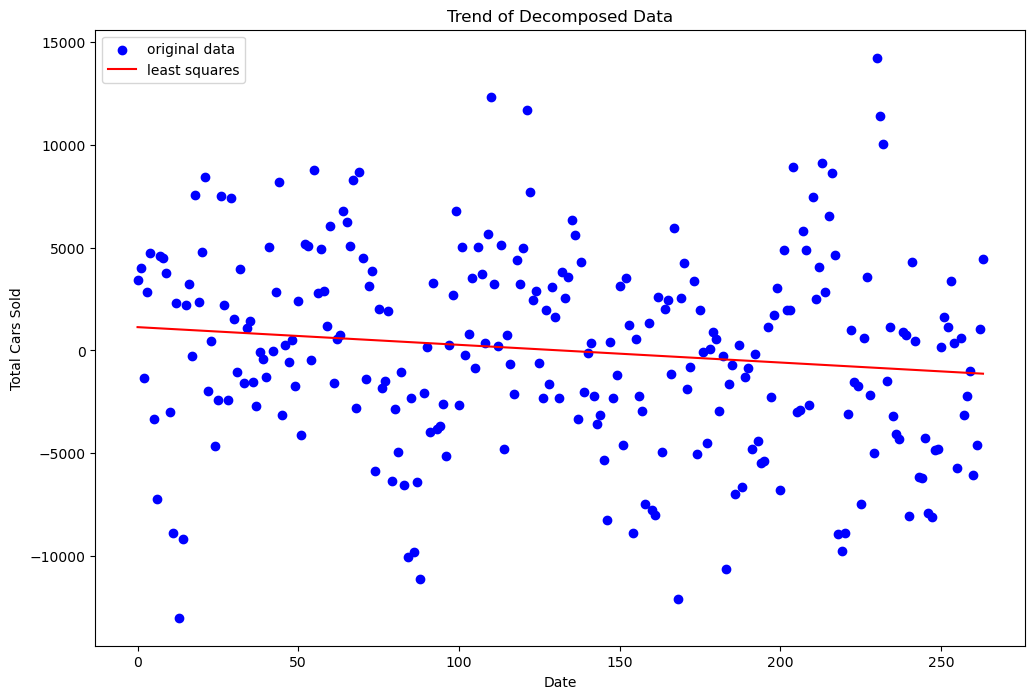

In [46]:
least_squares_line(components_removed_total_cars_sold.index ,components_removed_total_cars_sold['cyclical_deseasonalised_total_cars_sold'],
                   'Trend of Decomposed Data','Date','Total Cars Sold')

In [47]:
# detrend data
components_removed_total_cars_sold['decomposed_data'] = components_removed_total_cars_sold['cyclical_deseasonalised_total_cars_sold'] - 8.6 * np.arange(1,len(components_removed_total_cars_sold)+1)

# look at the adf test
adf_test(components_removed_total_cars_sold['decomposed_data'])

ADF Statistic:  -3.272913416404266
P-Value:  0.016133522176508926
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57


The detrending component makes the ADF test performance decrease. Therefore the decision to not detrend the data is going to be made.

#### Model of Total Cars Sold from Seasonal Decomposition

In [48]:
components_removed_total_cars_sold['constructed_data'] = components_removed_total_cars_sold['seasonal_value'] + components_removed_total_cars_sold['cyclical_component'] + components_removed_total_cars_sold['total_cars_sold'].mean()
components_removed_total_cars_sold['constructed_data']

0      77622.366028
1      74498.206390
2      94360.890670
3      93414.700572
4      93184.018884
           ...     
259    79610.939545
260    75328.697019
261    73842.781539
262    63935.474134
263    62144.435596
Name: constructed_data, Length: 264, dtype: float64

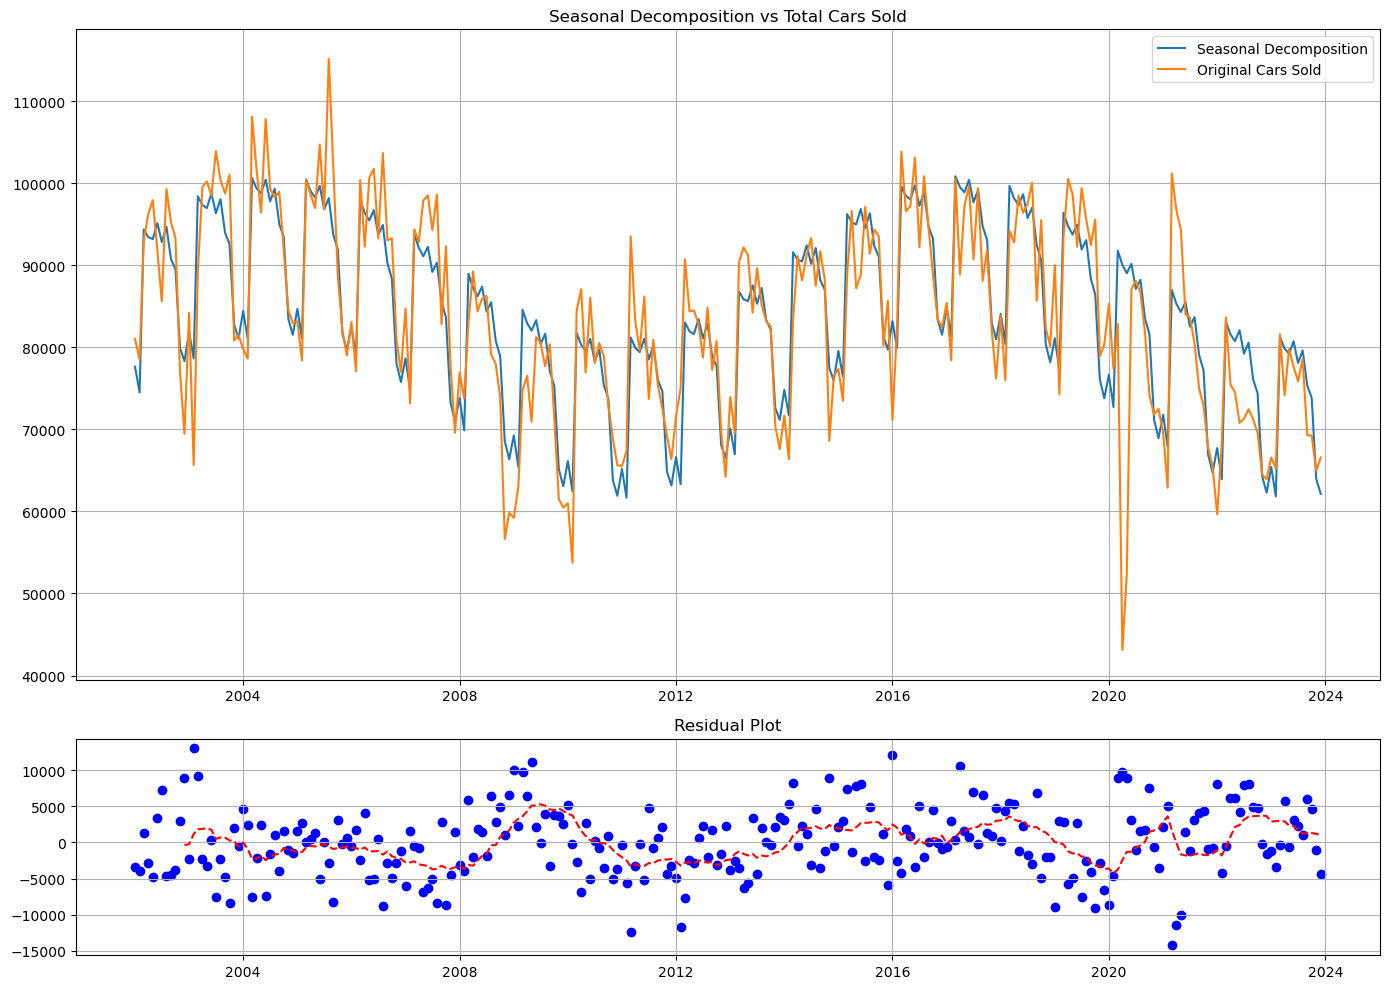

mean absolute error: 3788.822082085595


In [49]:
# create a residual plot of calculated and original number of cars sold
residual = components_removed_total_cars_sold['constructed_data'] - components_removed_total_cars_sold['total_cars_sold']

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # Define the grid layout

# Create subplots with the defined grid
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# Plot the standard deviation of month to month
ax0.plot(components_removed_total_cars_sold['date'], 
         components_removed_total_cars_sold['constructed_data'],label='Seasonal Decomposition')
ax0.plot(components_removed_total_cars_sold['date'], 
         total_cars_sold['total_cars_sold'],label='Original Cars Sold')
ax0.set_title('Seasonal Decomposition vs Total Cars Sold')
ax0.grid()
ax0.legend()

# Plot the standard deviation from year to year
ax1.scatter(components_removed_total_cars_sold['date'], residual,color='blue')
ax1.set_title('Residual Plot')
ax1.grid()

ax1.plot(components_removed_total_cars_sold['date'],residual.rolling(12).mean(),color='red',linestyle='--')

plt.tight_layout()
plt.show()

print('mean absolute error:',mean_absolute_error(components_removed_total_cars_sold['constructed_data'],components_removed_total_cars_sold['total_cars_sold']))

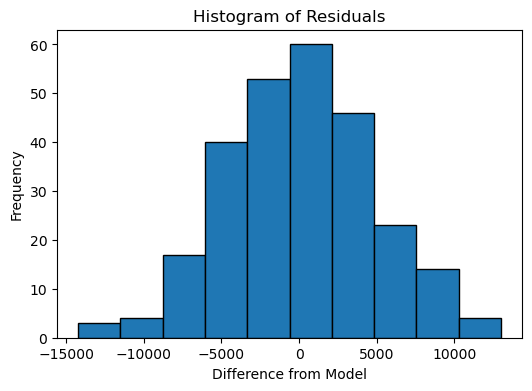

In [50]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_histogram(ax,residual,10,'Histogram of Residuals','Difference from Model','Frequency')

Observance of the histogram of the residual displays a normal distribution. This confirms that the data is stationary with an equal spread of data going above and below the model. With a MAE of 3788.82 when the average value is around 88,000 shows quite an accurate representation of the data. Forecasting the data is the next step

### Forecast Total Cars Sold using Seasonal Decomposition

#### Forecast Optimal Values

In [51]:
optimal_forecast = pd.DataFrame({'date':(pd.date_range('2002-01-01','2040-01-01',freq='M')-pd.offsets.MonthEnd(1) + pd.DateOffset(days=1))})

# create x values for cyclical sine function
sine_x_forecast = np.arange(1,len(optimal_forecast)+1)
optimal_forecast['cyclical'] = sine_function(sine_x_forecast,popt[0],popt[1],popt[2],0) 

# create month column to map to
optimal_forecast['month'] = optimal_forecast['date'].dt.month_name()

# map the values
optimal_forecast['seasonal'] = optimal_forecast['month'].map(seasonal_values)

# drop the month column
optimal_forecast.drop(columns='month',inplace=True)

# add the vertical shift
optimal_forecast['average'] = components_removed_total_cars_sold['total_cars_sold'].mean()

# create prediction value
optimal_forecast['prediction'] = optimal_forecast['cyclical'] + optimal_forecast['seasonal'] + optimal_forecast['average']

optimal_forecast

date     cyclical      seasonal       average    prediction
0   2002-01-01  3001.982109  -7884.609848  83848.272727  78965.644988
1   2002-02-01  3390.302753 -11809.382576  83848.272727  75429.192905
2   2002-03-01  3772.749019   8072.071970  83848.272727  95693.093716
3   2002-04-01  4148.658240   5053.026515  83848.272727  93049.957482
4   2002-05-01  4517.379080   4876.617424  83848.272727  93242.269231
..         ...          ...           ...           ...           ...
451 2039-08-01  2289.685314   7201.662879  83848.272727  93339.620920
452 2039-09-01  2686.885413   2246.571970  83848.272727  88781.730110
453 2039-10-01  3079.429945    712.981061  83848.272727  87640.683733
454 2039-11-01  3466.638747  -9752.428030  83848.272727  77562.483444
455 2039-12-01  3847.840903 -11131.382576  83848.272727  76564.731054

[456 rows x 5 columns]

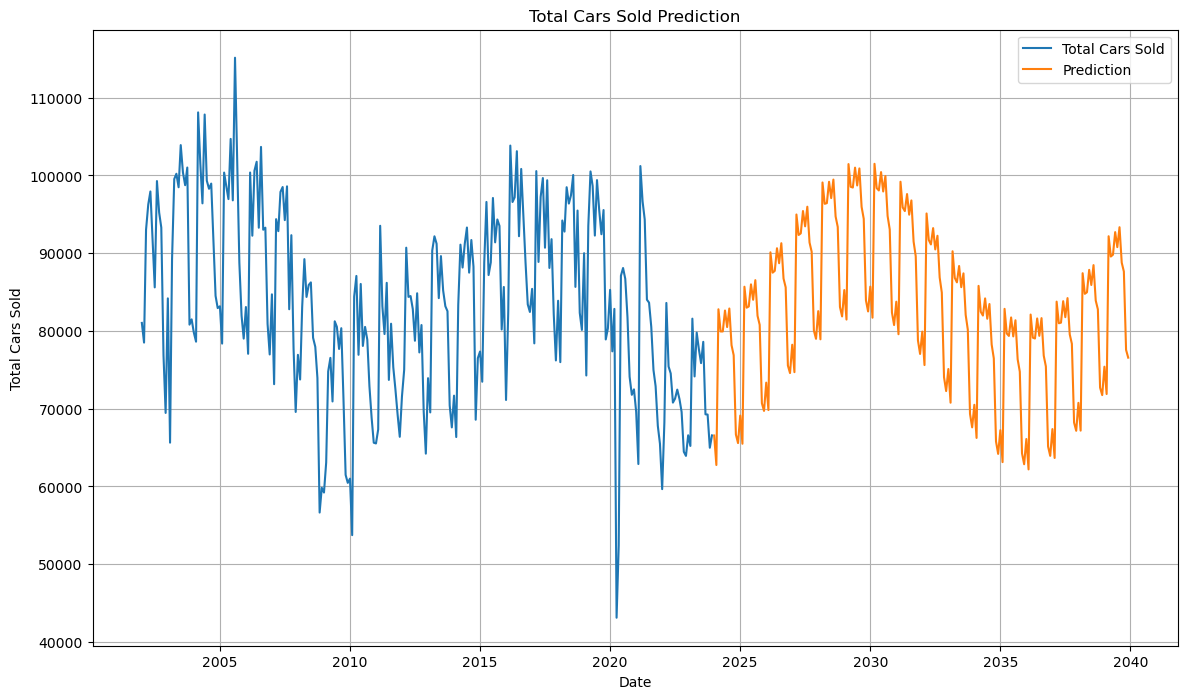

In [52]:
plot_multiple_series_multiple_xvalues([total_cars_sold.index,optimal_forecast['date'].iloc[264:]],
                                      [total_cars_sold['total_cars_sold'],optimal_forecast['prediction'].iloc[264:]],
                                      ['Total Cars Sold','Prediction'],'Total Cars Sold Prediction',
                                      'Date','Total Cars Sold',[1,1])

#### Forecast with Upper and Lower Bound

In [53]:
# create a dataframe with upper bounds
forecast_upper = pd.DataFrame({'date':(pd.date_range('2002-01-01','2040-01-01',freq='M')-pd.offsets.MonthEnd(1) + pd.DateOffset(days=1))})

forecast_upper['month'] = forecast_upper['date'].dt.month_name()

forecast_upper['seasonal'] = forecast_upper['month'].map(upper_seasonal_value)

forecast_upper.drop(columns='month',inplace=True)

forecast_upper['cyclical'] = sine_function(sine_x_forecast,*params_upper)

forecast_upper['prediction_upper'] = forecast_upper['cyclical'] + forecast_upper['seasonal']

forecast_upper

date      seasonal      cyclical  prediction_upper
0   2002-01-01  10241.533335  85745.424152      95986.957486
1   2002-02-01    114.485888  86164.667551      86279.153439
2   2002-03-01  24659.330715  86579.082374     111238.413090
3   2002-04-01  21232.851501  86987.930851     108220.782352
4   2002-05-01  23306.836504  87390.485119     110697.321623
..         ...           ...           ...               ...
451 2039-08-01  26424.713993  87505.982573     113930.696566
452 2039-09-01  21033.668827  87899.359825     108933.028652
453 2039-10-01  20973.442403  88284.820275     109258.262678
454 2039-11-01   4433.905036  88661.677699      93095.582736
455 2039-12-01   4475.006780  89029.261188      93504.267967

[456 rows x 4 columns]

In [54]:
forecast_lower = pd.DataFrame({'date':(pd.date_range('2002-01-01','2040-01-01',freq='M')-pd.offsets.MonthEnd(1) + pd.DateOffset(days=1))})

forecast_lower['month'] = forecast_lower['date'].dt.month_name()

forecast_lower['seasonal'] = forecast_lower['month'].map(lower_seasonal_value)

forecast_lower.drop(columns='month',inplace=True)

forecast_lower['cyclical'] = sine_function(sine_x_forecast,*params_lower)

forecast_lower['prediction_lower'] = forecast_lower['cyclical'] + forecast_lower['seasonal']

forecast_lower

date      seasonal      cyclical  prediction_lower
0   2002-01-01 -26010.753032  86485.721900      60474.968869
1   2002-02-01 -23733.251039  86842.372273      63109.121233
2   2002-03-01  -8515.186776  87192.339262      78677.152487
3   2002-04-01 -11126.798470  87535.032905      76408.234434
4   2002-05-01 -13553.601656  87869.875497      74316.273841
..         ...           ...           ...               ...
451 2039-08-01 -12021.388236  83441.918299      71420.530063
452 2039-09-01 -16540.524888  83829.742209      67289.217321
453 2039-10-01 -19547.480281  84215.961342      64668.481061
454 2039-11-01 -23938.761097  84599.924622      60661.163525
455 2039-12-01 -26737.771931  84980.984774      58243.212843

[456 rows x 4 columns]

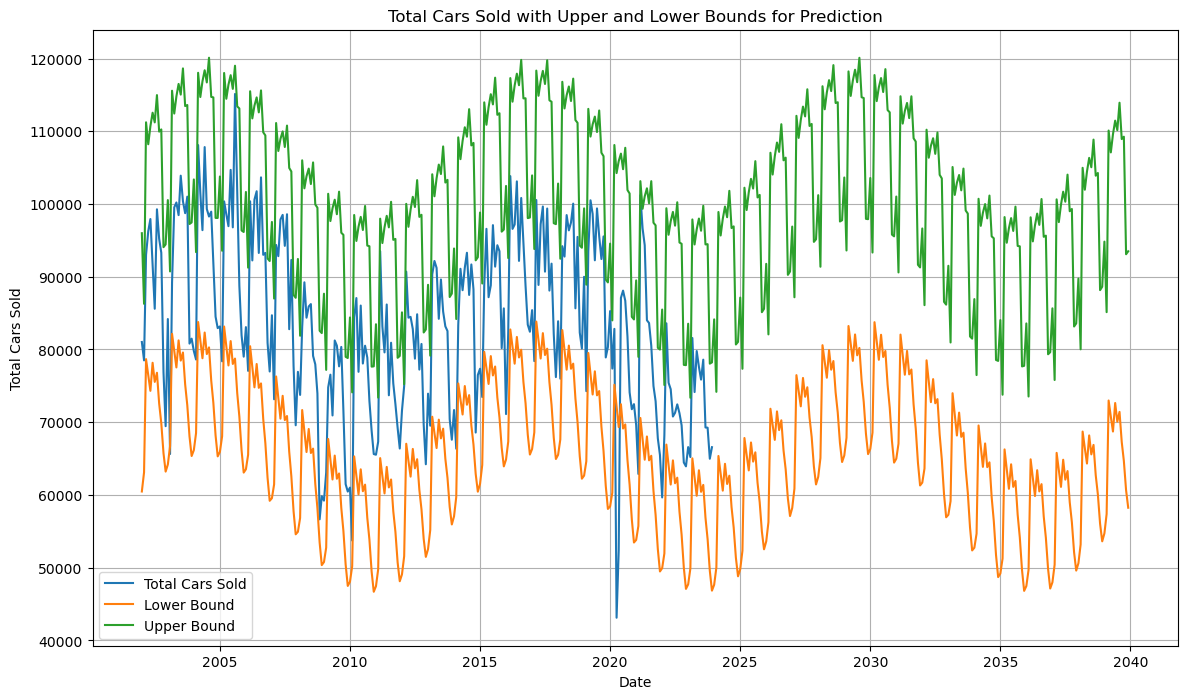

In [55]:
plot_multiple_series_multiple_xvalues([total_cars_sold.index,forecast_lower['date'],forecast_upper['date']],
                                      [total_cars_sold['total_cars_sold'],forecast_lower['prediction_lower'],
                                       forecast_upper['prediction_upper']],['Total Cars Sold','Lower Bound','Upper Bound'],
                                       'Total Cars Sold with Upper and Lower Bounds for Prediction','Date','Total Cars Sold',
                                       [1,1,1])

## Seasonal Decomposition of New Cars Sold

In [56]:
new_cars_sold = car_sales[['date','new_cars_sold']].copy()
new_cars_sold['date'] = pd.to_datetime(new_cars_sold['date'])
new_cars_sold.set_index('date',inplace=True)
new_cars_sold

new_cars_sold
date                     
2002-01-01          31106
2002-02-01          27520
2002-03-01          34225
2002-04-01          36452
2002-05-01          37359
...                   ...
2023-08-01          25876
2023-09-01          23892
2023-10-01          23775
2023-11-01          22720
2023-12-01          26010

[264 rows x 1 columns]

#### Initial EDA
Initial analysis of new cars sold
- Time Series Inspection
- Using packages to Seasonally Decompose data

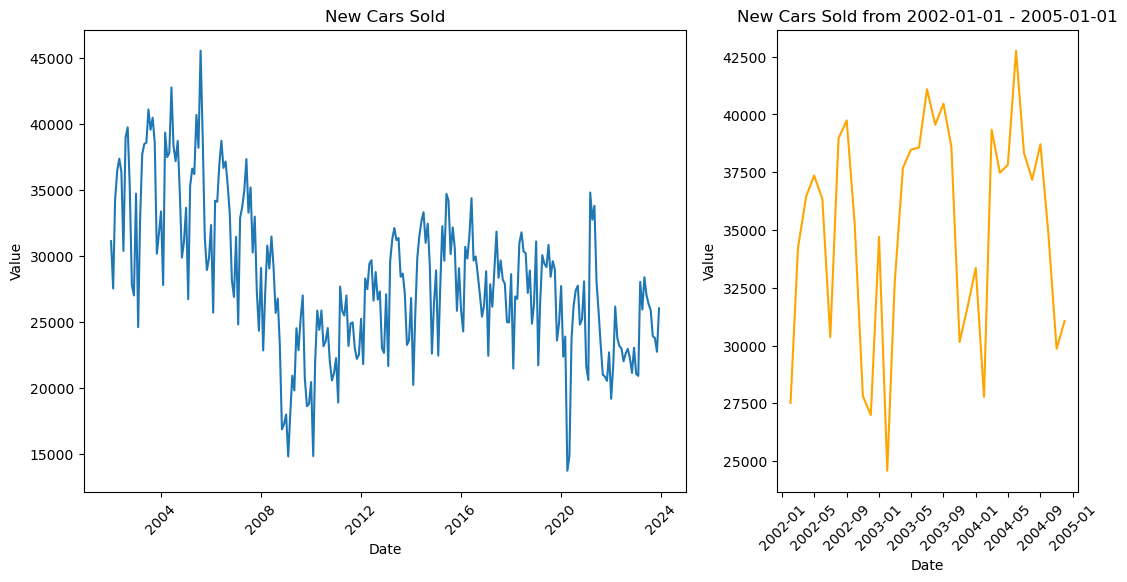

In [57]:
time_series_seasonal_analysis(new_cars_sold,'new_cars_sold','New Cars Sold','2002-01-01','2005-01-01')

##### Initial Observations : New Cars Sold 2002-2024 (left)
- Irregularities : The number of new cars sold did not seem to drop as intensly during 2020 compared with total cars sold. There is a steep decline that happens during 2008.

- Seasonality : There seems to be only one month where the seaosnal value is farl ower than the rest, this is observable due to the spike that takes place on a frequest occurence.

- Cyclical : There seems to be a strong decline due to GFC but not as much of one following 2020, in fact the decline actually begins in 2016.

- Trend : There is a strong negative trend over time

Initial Observations : New Cars Sold 2002-2005 (right)
- Seasonality : The seasonal patter is again 12 periods as observed by the steep decline that takes places around January of each year.


Linear Regression
Slope: -36.21777169195106
Intercept: 32829.62424601008


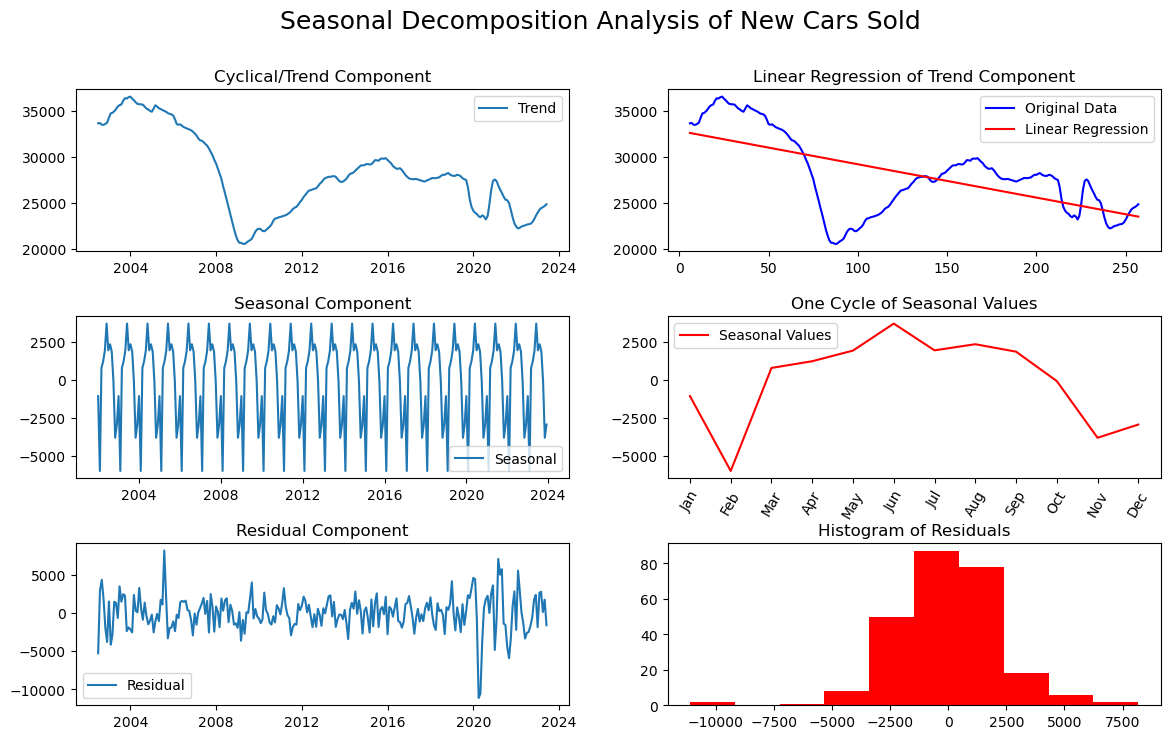

In [58]:
# using the periods found above do a seasonal decomposition of data
seasonal_decomposition_analysis(new_cars_sold,'New Cars Sold',12)

- Cyclical/Trend Component (Top Left) : The recovery phase of new cars sold does not return to prior to GFC which suggests that there is a systemic switch to used cars sold, which could be due to a number of reasons.

- Linear Regression (Top Right) : There is a decrease of 36 cars sold per month and the decreasing trend is quite strong.
- Seasonal Component (Middle Left) : Seasonal reptition looks quite sporadic.
- One Cycle of Seasonal Values (Middle Right) : There is a large dip in Febfruary, Novemeber and December meanwhile the rest of the months seem to howver above the mean across a year with the climax occuring during June.
- Residual Component (Bottom Left) : The residual is quite high but it does seem to increase post 2020 where as prior to that it was relatively constant above and below the mean of 0.
- Histogram of Residuals (Bottom Right) : The residual plot shows almost a normal distribution with a for more values falling above the mean, leaving it negatively skewed.

### Remove Irregularities and Seasonal Components
As new cars sold can be a contributing factor to total cars sold there is no need to model the changes especially after observing the less than easy cycle found in the top left of the initial decomposition. 
- Remove irregularities : to get a more accurate seasonal value and to concentrate on cyclical movements rather than individual months
- Remove seasonality : removing the seasonality can isolate the cylical movement within the new cars sold.

#### Irregularity Removal

In [59]:
# create wide data format of cars sold
monthly_new_cars_sold = create_monthly_data(new_cars_sold,'new_cars_sold',np.arange(len(new_cars_sold)),'2002','2024')

# create z score of new cars sold
zscore_monthly_new_cars_sold = (monthly_new_cars_sold-monthly_new_cars_sold.mean()) / monthly_new_cars_sold.std()
zscore_monthly_new_cars_sold[abs(zscore_monthly_new_cars_sold)>2.1]

January  February     March     April       May June July    August  \
2002     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2003     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2004     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2005     NaN       NaN       NaN       NaN       NaN  NaN  NaN  2.485508   
2006     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2007     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2008     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2009     NaN -2.215602 -2.269478       NaN       NaN  NaN  NaN       NaN   
2010     NaN -2.206721       NaN       NaN       NaN  NaN  NaN       NaN   
2011     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2012     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2013     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2014     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2015     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2016     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2017     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2018     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2019     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2020     NaN       NaN       NaN -2.714784 -2.550838  NaN  NaN       NaN   
2021     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2022     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2023     NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   

     September   October November December  
2002       NaN       NaN      NaN      NaN  
2003       NaN  2.115703      NaN      NaN  
2004       NaN       NaN      NaN      NaN  
2005       NaN       NaN      NaN      NaN  
2006       NaN       NaN      NaN      NaN  
2007       NaN       NaN      NaN      NaN  
2008       NaN       NaN      NaN -2.17541  
2009       NaN       NaN      NaN      NaN  
2010       NaN       NaN      NaN      NaN  
2011       NaN       NaN      NaN      NaN  
2012       NaN       NaN      NaN      NaN  
2013       NaN       NaN      NaN      NaN  
2014       NaN       NaN      NaN      NaN  
2015       NaN       NaN      NaN      NaN  
2016       NaN       NaN      NaN      NaN  
2017       NaN       NaN      NaN      NaN  
2018       NaN       NaN      NaN      NaN  
2019       NaN       NaN      NaN      NaN  
2020       NaN       NaN      NaN      NaN  
2021       NaN       NaN      NaN      NaN  
2022       NaN       NaN      NaN      NaN  
2023       NaN       NaN      NaN      NaN

In [60]:
# create seasonal values of new cars sold
new_cars_seasonal_values = monthly_new_cars_sold.mean() - new_cars_sold['new_cars_sold'].mean()

# remove irregularities and replace with the seasonal value plus average from the year
monthly_new_cars_sold_irr_removed, expected_values = remove_irregularities(
    monthly_new_cars_sold,
    zscore_monthly_new_cars_sold,
    new_cars_seasonal_values,
    2.1
)
monthly_new_cars_sold_irr_removed

Found: 38597 at (2003, October), Replacing with: 35465
Found: 45547 at (2005, August), Replacing with: 37408
Found: 17220 at (2008, December), Replacing with: 22822
Found: 14779 at (2009, February), Replacing with: 14880
Found: 17844 at (2009, March), Replacing with: 21640
Found: 14809 at (2010, February), Replacing with: 16472
Found: 13700 at (2020, April), Replacing with: 25160
Found: 14835 at (2020, May), Replacing with: 25842


January February  March  April    May   June   July August September  \
2002   31106    27520  34225  36452  37359  36348  30367  38965     39740   
2003   34707    24585  32705  37682  38472  38573  41088  39556     40464   
2004   33361    27780  39340  37478  37819  42758  38329  37175     38712   
2005   33637    26707  35277  36609  36191  40674  38189  37408     38909   
2006   32331    25688  34167  34099  36904  38718  36662  37151     35334   
2007   31430    24793  32862  33705  34931  37333  33259  35186     30248   
2008   29072    22819  27118  30769  29035  31463  29188  25666     26751   
2009   17963    14880  21640  20905  19781  24509  22836  25251     26992   
2010   20419    16472  21920  25844  24383  25850  23136  23512     24520   
2011   22239    18863  27667  25793  25464  26984  23154  24875     24945   
2012   25223    21783  28280  27467  29390  29662  26593  28765     26671   
2013   27083    21639  29606  31273  32103  31181  31348  28407     28654   
2014   26792    20202  25318  29820  31504  32620  33299  30982     32431   
2015   28889    22430  27428  32240  29626  34695  34179  30125     32154   
2016   25835    24257  30675  29787  31525  34366  29636  29945     28544   
2017   28827    22413  27838  26135  28931  31835  28331  29644     28175   
2018   28607    21448  26914  26729  30967  31779  30342  30188     27180   
2019   31090    21694  26485  30044  29396  29142  30821  28399     29591   
2020   27704    22344  23873  25160  25842  23704  26190  27372     27733   
2021   21674    20579  34794  32730  33788  28039  25779  23233     20975   
2022   19160    21769  26148  23756  23162  22954  22001  22594     22941   
2023   21037    20893  28023  25918  28372  27001  26360  25876     23892   

     October November December  
2002   35276    27812    26994  
2003   35465    30155    31668  
2004   34839    29859    31058  
2005   31392    28915    29787  
2006   33211    28138    26879  
2007   32965    27160    24312  
2008   23216    16842    22822  
2009   20717    18590    18761  
2010   22003    20551    21075  
2011   22996    22177    22512  
2012   27300    22996    22632  
2013   27106    23235    23574  
2014   29250    22582    26419  
2015   30552    25828    29062  
2016   27082    25381    26205  
2017   27886    24970    24944  
2018   28879    24846    26350  
2019   28967    23573    24839  
2020   24777    25187    28061  
2021   20843    20511    22677  
2022   22255    21117    23025  
2023   23775    22720    26010

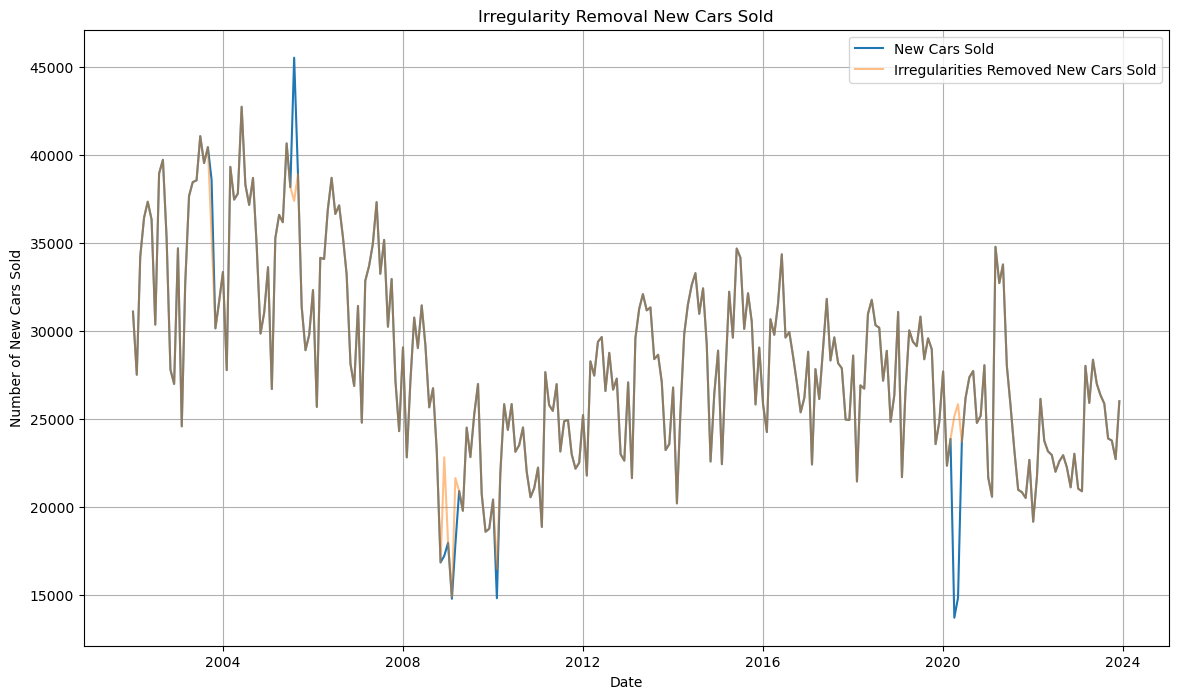

In [61]:
# convert the wide data which has had irregularities removed into long data
components_removed_new_cars_sold = convert_to_long_format(monthly_new_cars_sold_irr_removed,'2002-01-01','2024-01-01','new_cars_sold','M')

# plot the two series comparison
plot_multiple_series_one_xvalues(new_cars_sold.index, [new_cars_sold['new_cars_sold'],components_removed_new_cars_sold['new_cars_sold']],
                                 ['New Cars Sold','Irregularities Removed New Cars Sold'],'Irregularity Removal New Cars Sold',
                                 'Date','Number of New Cars Sold',[1,0.5])

#### Deseasonlise Data
Use the new irregularities removed to find the seasonal values and remove them from the data to create deseasonalised data.

January     -1022.060606
February    -5868.787879
March         983.257576
April        1805.621212
May          2466.984848
June         3614.393939
July         1837.075758
August       1800.166667
September    1585.666667
October      -450.878788
November    -3978.469697
December    -2772.969697
dtype: float64


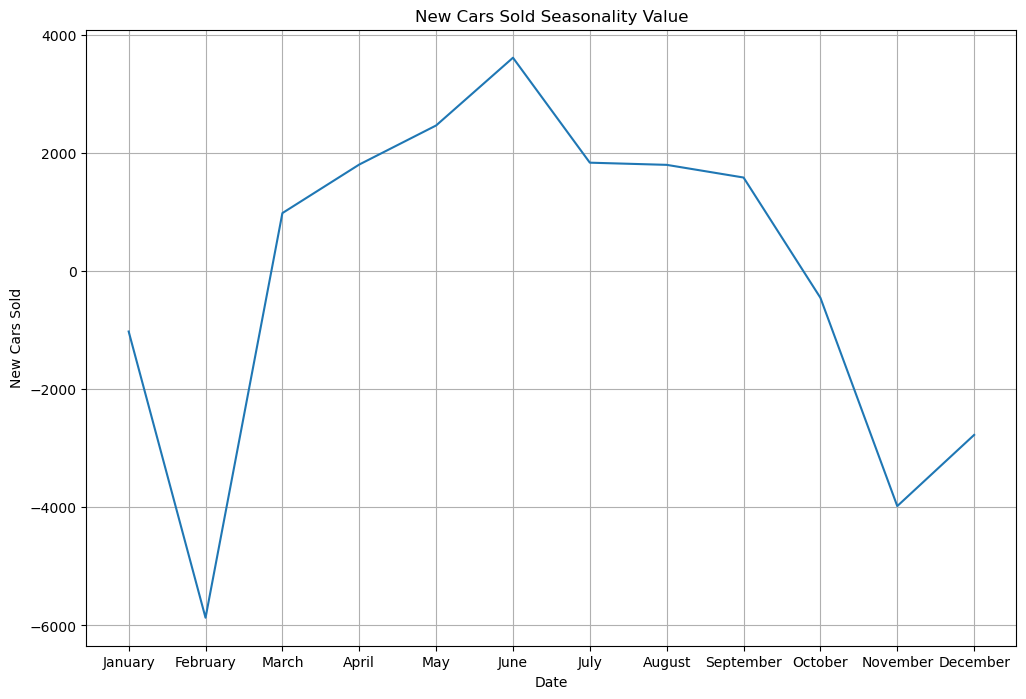

In [62]:
# create new cars sold seasonal values
new_cars_seasonal_values_irr_removed = monthly_new_cars_sold_irr_removed.mean() - components_removed_new_cars_sold['new_cars_sold'].mean()

print(new_cars_seasonal_values_irr_removed)

line_series(months,new_cars_seasonal_values_irr_removed.values,'New Cars Sold Seasonality Value','Date','New Cars Sold',True)

The new cars sold have their highest point in June with lowest in February, November and December, while January and March through October are far higher than the other values.

In [63]:
# deseasonlise data
deseasonalize_series(components_removed_new_cars_sold,'date','new_cars_sold',new_cars_seasonal_values_irr_removed)

date  new_cars_sold  seasonal_value  deseasonalised_new_cars_sold
0   2002-01-01          31106    -1022.060606                  32128.060606
1   2002-02-01          27520    -5868.787879                  33388.787879
2   2002-03-01          34225      983.257576                  33241.742424
3   2002-04-01          36452     1805.621212                  34646.378788
4   2002-05-01          37359     2466.984848                  34892.015152
..         ...            ...             ...                           ...
259 2023-08-01          25876     1800.166667                  24075.833333
260 2023-09-01          23892     1585.666667                  22306.333333
261 2023-10-01          23775     -450.878788                  24225.878788
262 2023-11-01          22720    -3978.469697                  26698.469697
263 2023-12-01          26010    -2772.969697                  28782.969697

[264 rows x 4 columns]

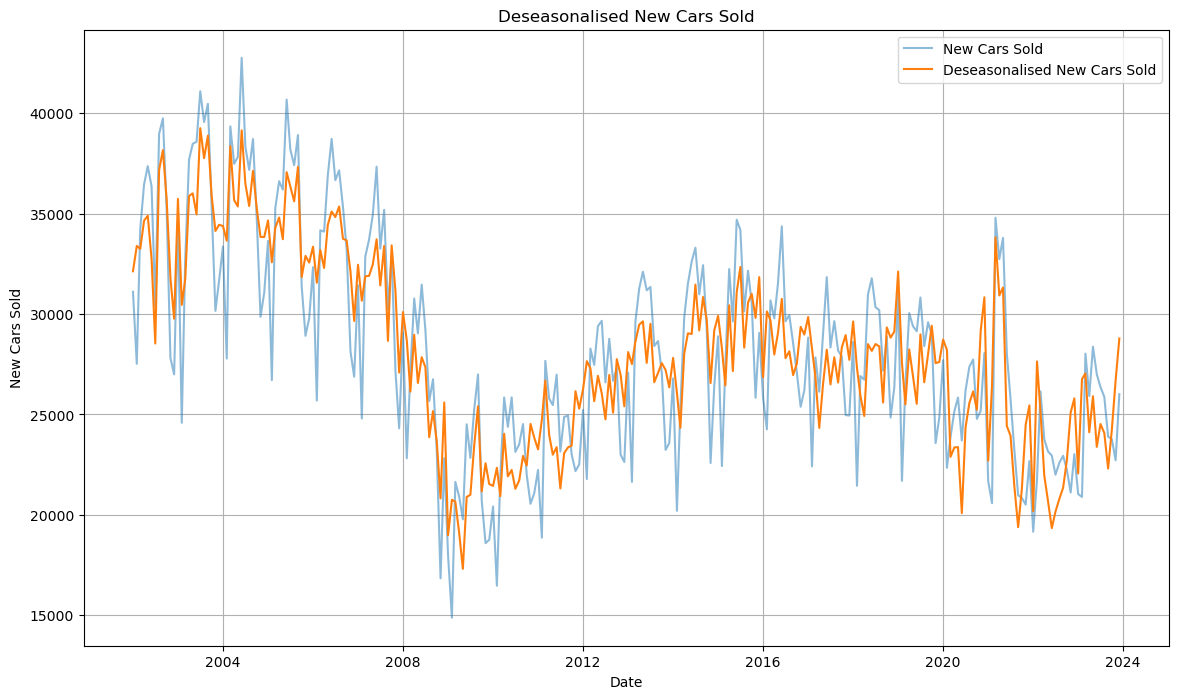

In [78]:
# plot the deseasonalised new cars sold
plot_multiple_series_one_xvalues(components_removed_new_cars_sold['date'],
                                 [components_removed_new_cars_sold['new_cars_sold'],components_removed_new_cars_sold['deseasonalised_new_cars_sold']],
                                 ['New Cars Sold','Deseasonalised New Cars Sold'],'Deseasonalised New Cars Sold','Date','New Cars Sold',
                                 [0.5,1])

## Seasonal Decomposition of Used Cars Sold

In [79]:
used_cars_sold = car_sales[['date','used_cars_sold']].copy()
used_cars_sold['date'] = pd.to_datetime(used_cars_sold['date'])
used_cars_sold.set_index('date',inplace=True)
used_cars_sold

used_cars_sold
date                      
2002-01-01           49927
2002-02-01           50982
2002-03-01           58794
2002-04-01           59817
2002-05-01           60577
...                    ...
2023-08-01           52725
2023-09-01           45386
2023-10-01           45473
2023-11-01           42260
2023-12-01           40556

[264 rows x 1 columns]

#### Initial EDA of Used Cars Sold
Initial analysis of used cars sold
- Time Series Inspection
- Using Packages to Seasonally Decompose Used Cars Sold

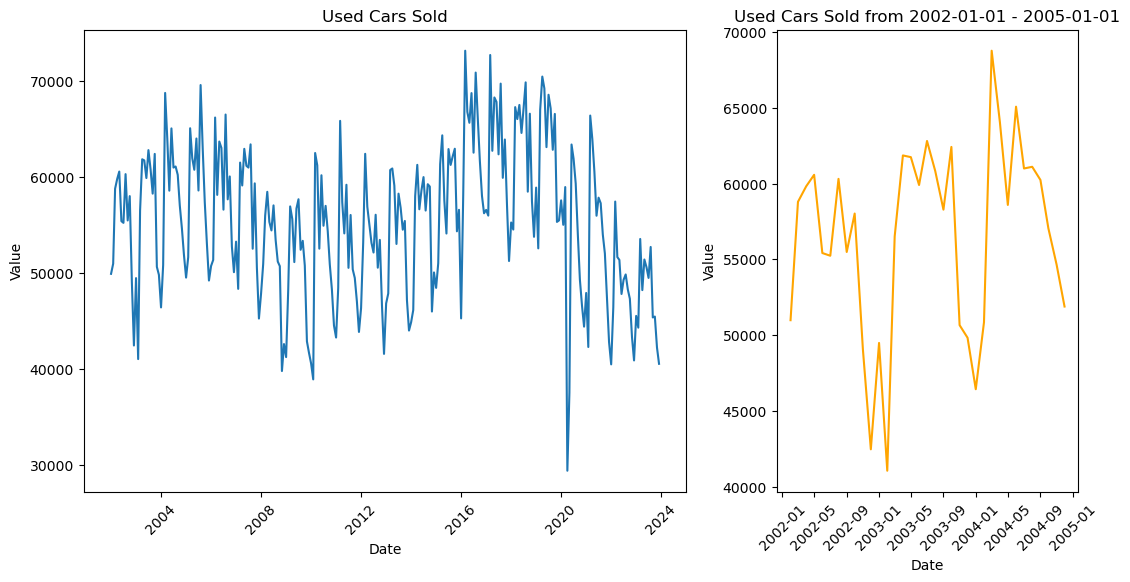

In [80]:
time_series_seasonal_analysis(used_cars_sold,'used_cars_sold','Used Cars Sold','2002-01-01','2005-01-01')

##### Initial Observations : Used Cars Sold 2002-2024 (left)
- Irregularities : There is a large irregularity in 2020 with another in 2010 but the irregularity that usually lies at August 2005 is not as viewable.

- Seasonality : There are spikes with lower values happening for two months of the year rather than one

- Cyclical : Seems to follow a sinusoidal pattern similar to total cars sold - this is likely due to the majority of used cars sold making up total cars sold.

- Trend : There does not seem to be any trend

##### Initial Observations : Used Cars Sold 2002-2005 (right)
- Seasonality : Seems to take place once every 12 periods.

Linear Regression
Slope: -2.858691840330508
Intercept: 56012.30554314102


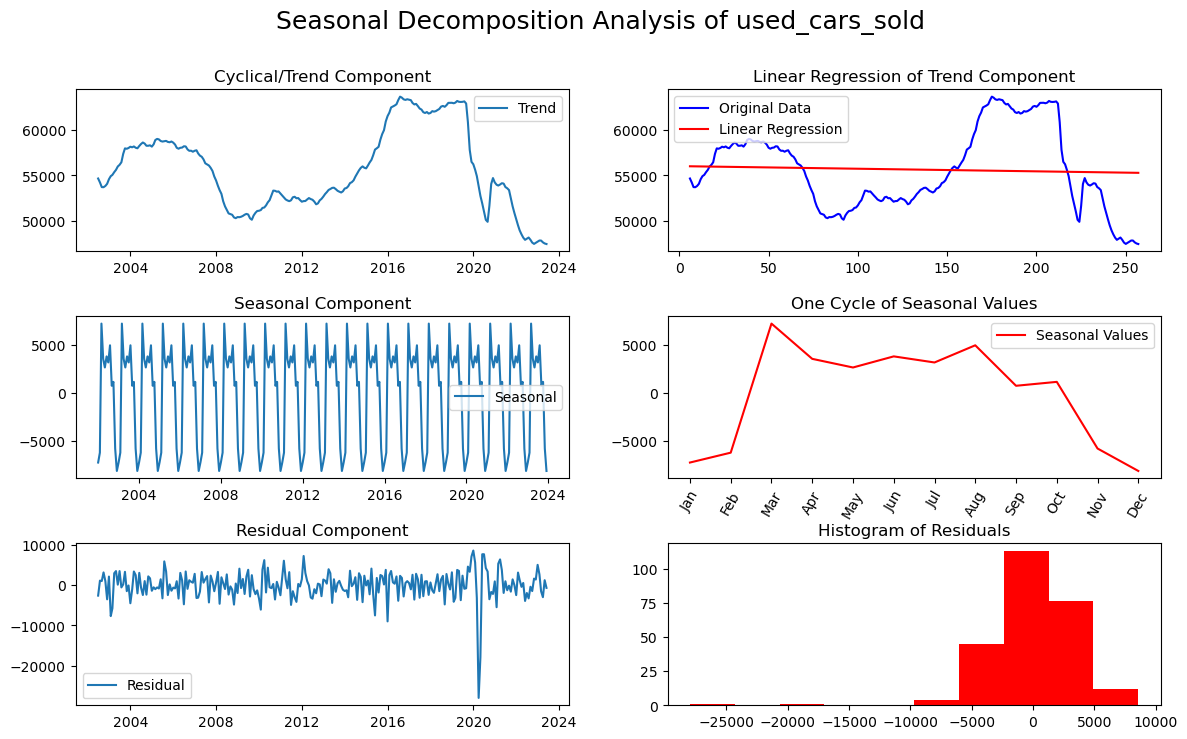

In [81]:
seasonal_decomposition_analysis(used_cars_sold,'used_cars_sold',12)

- Cyclical/Trend Component (Top Left) : The downturn in 2008 is not as large as the recovery up to new high levels of used cars sold.

- Linear Regression (Top Right) : There is a decrease of about 3 cars per month which is not significant enough to suggest that there was a large change in general number of used cars sold overall.

- Seasonal Component (Middle Left) : The seasonal repition looks similar to total cars sold

- One Cycle of Seasonal Values (Middle Right) : January, February, November and December have values about 5000 cars per month less than average meanwhile March-October were months with greater than average cars sold in those months.

- Residual Component (Bottom Left) : The residual shows the irregularity in 2020 being a great outlier which is why irregularities need to be removed.

- Histogram of Residuals (Bottom Right) : The residuals are relatively normally distributed but there is a slight neegative skewed.

### Remove Irregularities and Seasonal Components
Used cars sold make up the majority of total cars sold. This will be further explored in chapter 3. However, you would expect that the total cars sold to be quite similar to used cars sold. The largest difference seems to be the change in used/new cars sold post GFC.

- Remove irregularities : To get a more accurate seasonal value .

- Remove seasonality : removing the seasonal value will isolate cyclical movements.

#### Irregularity Removal

In [85]:
# create wide data format of used cars sold
monthly_used_cars_sold = create_monthly_data(used_cars_sold,'used_cars_sold',np.arange(len(used_cars_sold)),'2002','2024')

# create zscore of used cars sold
zscore_monthly_used_cars_sold  = (monthly_used_cars_sold - monthly_used_cars_sold.mean()) / monthly_used_cars_sold.std()
zscore_monthly_used_cars_sold[abs(zscore_monthly_used_cars_sold) > 2]

January  February March     April       May      June July August  \
2002     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2003     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2004     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2005     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2006     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2007     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2008     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2009     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2010     NaN -2.157543   NaN       NaN       NaN       NaN  NaN    NaN   
2011     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2012     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2013     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2014     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2015     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2016     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2017     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2018     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2019     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2020     NaN       NaN   NaN -3.598324 -2.873991       NaN  NaN    NaN   
2021     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   
2022     NaN       NaN   NaN       NaN       NaN -2.007032  NaN    NaN   
2023     NaN       NaN   NaN       NaN       NaN       NaN  NaN    NaN   

     September October November December  
2002       NaN     NaN      NaN      NaN  
2003       NaN     NaN      NaN      NaN  
2004       NaN     NaN      NaN      NaN  
2005       NaN     NaN      NaN      NaN  
2006       NaN     NaN      NaN      NaN  
2007       NaN     NaN      NaN      NaN  
2008       NaN     NaN      NaN      NaN  
2009       NaN     NaN      NaN      NaN  
2010       NaN     NaN      NaN      NaN  
2011       NaN     NaN      NaN      NaN  
2012       NaN     NaN      NaN      NaN  
2013       NaN     NaN      NaN      NaN  
2014       NaN     NaN      NaN      NaN  
2015       NaN     NaN      NaN      NaN  
2016       NaN     NaN      NaN      NaN  
2017       NaN     NaN      NaN      NaN  
2018       NaN     NaN      NaN      NaN  
2019       NaN     NaN      NaN      NaN  
2020       NaN     NaN      NaN      NaN  
2021       NaN     NaN      NaN      NaN  
2022       NaN     NaN      NaN      NaN  
2023 -2.019447     NaN      NaN      NaN

In [89]:
# create seasonal value of used cars sold
used_cars_seasonal_values = monthly_used_cars_sold.mean() - used_cars_sold['used_cars_sold'].mean()

# remove irregularities and replace with the seasonal values from the year
monthly_used_cars_sold_irr_removed, expected_values = remove_irregularities(
    monthly_used_cars_sold,
    zscore_monthly_used_cars_sold,
    used_cars_seasonal_values,
    2
)
monthly_used_cars_sold_irr_removed

Found: 38932 at (2010, February), Replacing with: 46226
Found: 29420 at (2020, April), Replacing with: 55149
Found: 37572 at (2020, May), Replacing with: 54291
Found: 47829 at (2022, June), Replacing with: 51534
Found: 45386 at (2023, September), Replacing with: 48043


January February  March  April    May   June   July August September  \
2002   49927    50982  58794  59817  60577  55415  55235  60310     55485   
2003   49481    41048  56513  61856  61742  59904  62811  60829     58279   
2004   46427    50842  68766  64059  58589  65073  60994  61106     60238   
2005   49534    51666  65088  61977  60765  64021  58605  69589     62941   
2006   50745    51372  66205  58148  63707  63039  56611  66516     57684   
2007   53277    48360  61513  59128  62944  61175  60991  63410     52541   
2008   47857    50937  55978  58468  55339  54449  57055  53455     51206   
2009   41254    48308  56948  55631  51149  56732  57693  52432     53361   
2010   40588    46226  62510  61229  52548  60192  54934  57005     54371   
2011   43292    48464  65857  57373  54135  59203  50549  56055     50389   
2012   46367    53216  62426  56913  55096  53148  52146  56079     50566   
2013   46843    47884  60740  60899  59114  53038  58276  56801     54525   
2014   44887    46154  58015  61277  56649  58619  60001  56517     59261   
2015   48465    51038  61346  64350  57563  54124  62920  61268     62182   
2016   45285    58184  73163  66793  65659  68750  62545  70887     66056   
2017   56583    55989  72717  62740  68296  67827  62372  69737     59925   
2018   55276    54539  67288  66047  67515  64600  67117  69867     58483   
2019   58907    52578  67022  70469  69242  63122  68577  67159     62846   
2020   57577    55032  58963  55149  54291  63395  61905  59328     54035   
2021   47934    42306  66410  63931  60551  55978  57859  57280     54004   
2022   40497    46442  57453  51670  51373  51534  49295  49861     48298   
2023   45543    44320  53557  48230  51416  50613  49502  52725     48043   

     October November December  
2002   58020    49066    42461  
2003   62417    50655    49823  
2004   57046    54654    51883  
2005   57367    53053    49229  
2006   60068    52776    50097  
2007   59348    50593    45269  
2008   50727    39803    42611  
2009   50783    42895    41703  
2010   50911    48275    44550  
2011   49497    47040    43874  
2012   53460    46673    41588  
2013   55433    47181    44021  
2014   59014    46000    50072  
2015   62954    54354    56592  
2016   61678    58037    56234  
2017   63917    57147    51261  
2018   66603    57480    53781  
2019   66581    55334    55489  
2020   49328    46598    44427  
2021   52045    47276    42812  
2022   47325    43345    40906  
2023   45473    42260    40556

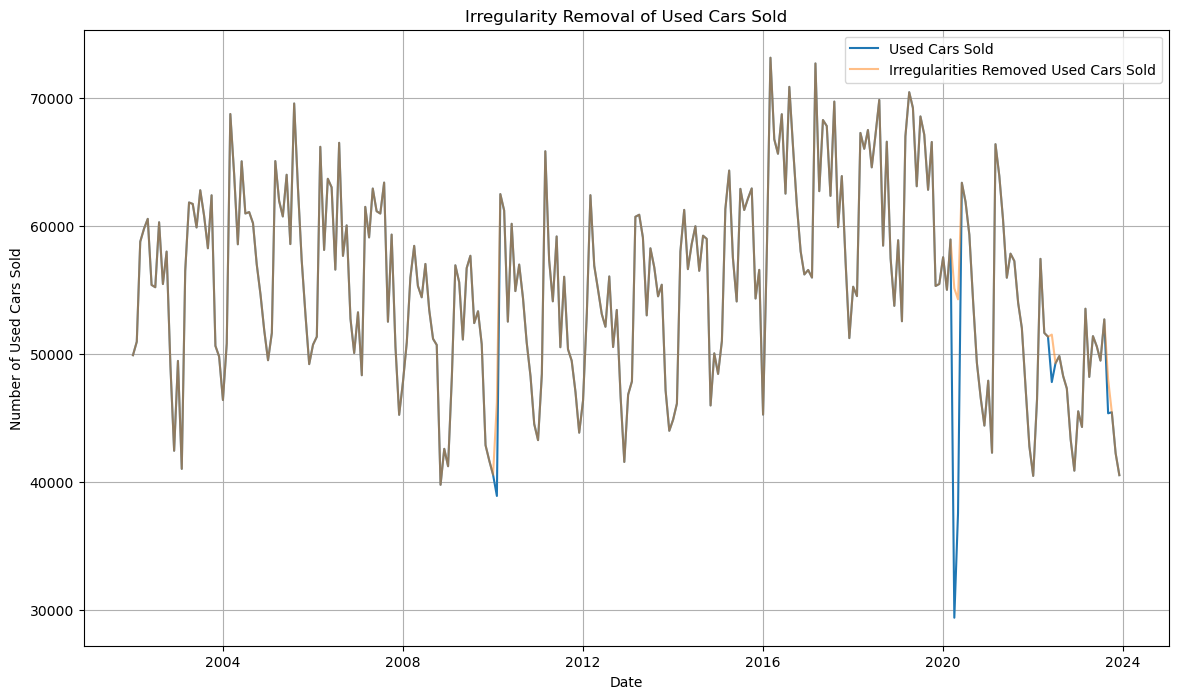

In [91]:
# convert the wide data to long data to incorporate the irregularities
components_removed_used_cars_sold = convert_to_long_format(monthly_used_cars_sold_irr_removed,'2002-01-01','2024-01-01','used_cars_sold','M')

# plot the two series comparison
plot_multiple_series_one_xvalues(used_cars_sold.index,[used_cars_sold['used_cars_sold'],components_removed_used_cars_sold['used_cars_sold']],
                                 ['Used Cars Sold','Irregularities Removed Used Cars Sold'],'Irregularity Removal of Used Cars Sold',
                                 'Date','Number of Used Cars Sold',[1,0.5])

#### Deseasonlise Data
Use the used cars sold with irregularities removed to find seasonal values.

January     -7159.753788
February    -5826.071970
March        6964.155303
April        4640.609848
May          3372.700758
June         3631.382576
July         2906.018939
August       4734.337121
September     484.473485
October       724.291667
November    -6071.162879
December    -8400.981061
dtype: float64


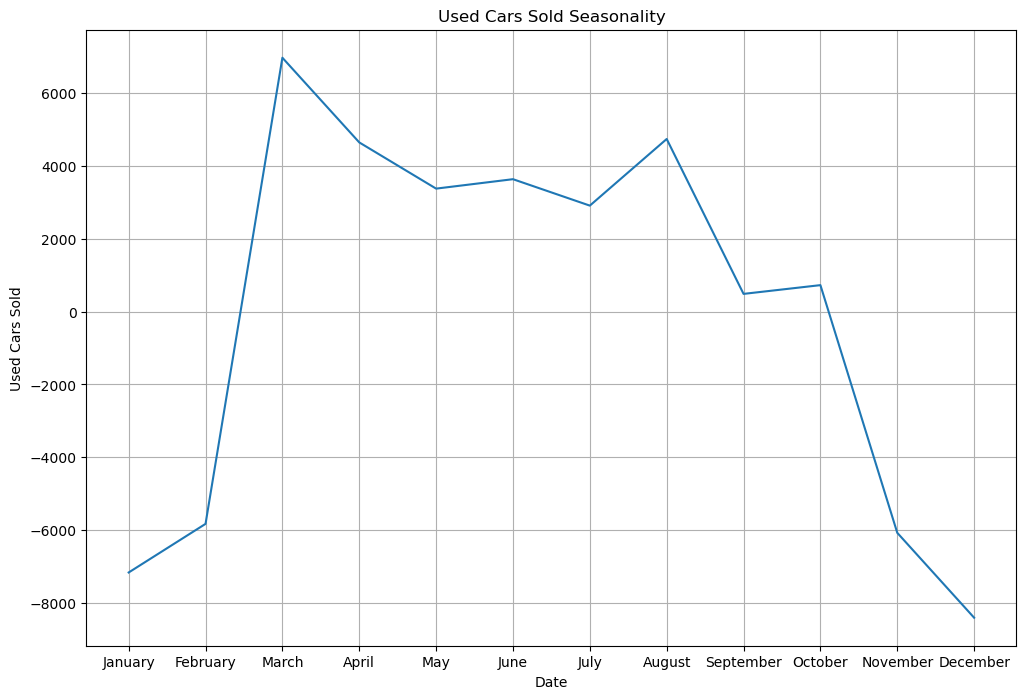

In [92]:
# create used cars sold seasonal values
used_cars_seasonal_values_irr_removed = monthly_used_cars_sold_irr_removed.mean() - components_removed_used_cars_sold['used_cars_sold'].mean()

print(used_cars_seasonal_values_irr_removed)

line_series(months,used_cars_seasonal_values_irr_removed.values,'Used Cars Sold Seasonality','Date','Used Cars Sold',True)

Used cars sold shows a similar seasonal value to total cars sold. Similar to before there are lower values in January, February, November and December while March has the greatest seasonal value which decrease downwards towards October.

In [93]:
# deseasonlise the used cars sold data
deseasonalize_series(components_removed_used_cars_sold,'date','used_cars_sold',used_cars_seasonal_values_irr_removed)

date  used_cars_sold  seasonal_value  deseasonalised_used_cars_sold
0   2002-01-01           49927    -7159.753788                   57086.753788
1   2002-02-01           50982    -5826.071970                   56808.071970
2   2002-03-01           58794     6964.155303                   51829.844697
3   2002-04-01           59817     4640.609848                   55176.390152
4   2002-05-01           60577     3372.700758                   57204.299242
..         ...             ...             ...                            ...
259 2023-08-01           52725     4734.337121                   47990.662879
260 2023-09-01           48043      484.473485                   47558.526515
261 2023-10-01           45473      724.291667                   44748.708333
262 2023-11-01           42260    -6071.162879                   48331.162879
263 2023-12-01           40556    -8400.981061                   48956.981061

[264 rows x 4 columns]

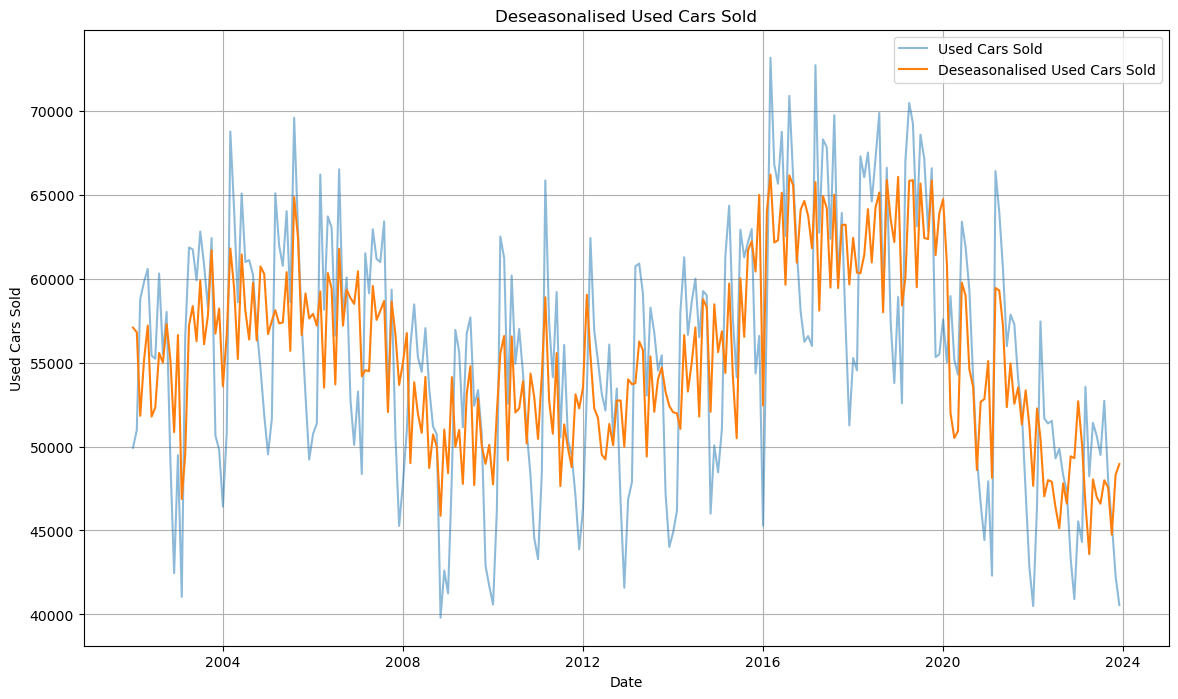

In [94]:
# plot the deseasonalised used cars sold
plot_multiple_series_one_xvalues(components_removed_used_cars_sold['date'],
                                 [components_removed_used_cars_sold['used_cars_sold'],components_removed_used_cars_sold['deseasonalised_used_cars_sold']],
                                 ['Used Cars Sold','Deseasonalised Used Cars Sold'],'Deseasonalised Used Cars Sold','Date','Used Cars Sold',[0.5,1])

## Seasonal Decomposition of Value of Cars Sold
Value of Cars Sold is multiplying the total cars sold by the price of the transaction. This adds new fundamental information to the data.
- Average Price of Cars : Can look at real and nominal average price of cars by looking at the value of cars sold with the decomposition of total cars sold. This can entail how the cost of living for luxuary items such as cars has changed over time, with changing economies.

### Initial Seasonal Decomposition of Value of Cars Sold

In [64]:
# get total cars sold as the data
value_cars_sold = car_sales[['date','total_value_cars_sold']].copy()
value_cars_sold['date'] = pd.to_datetime(value_cars_sold['date'])
value_cars_sold.set_index('date',inplace=True)
value_cars_sold

total_value_cars_sold
date                             
2002-01-01             1141497749
2002-02-01             1025807465
2002-03-01             1225051631
2002-04-01             1279429447
2002-05-01             1297575194
...                           ...
2023-08-01             2131035952
2023-09-01             1879114283
2023-10-01             1863262680
2023-11-01             1756655669
2023-12-01             1907969542

[264 rows x 1 columns]

#### Initial EDA
- Time Series Inspection
- Seasonal Decomposition of Value of Cars Sold

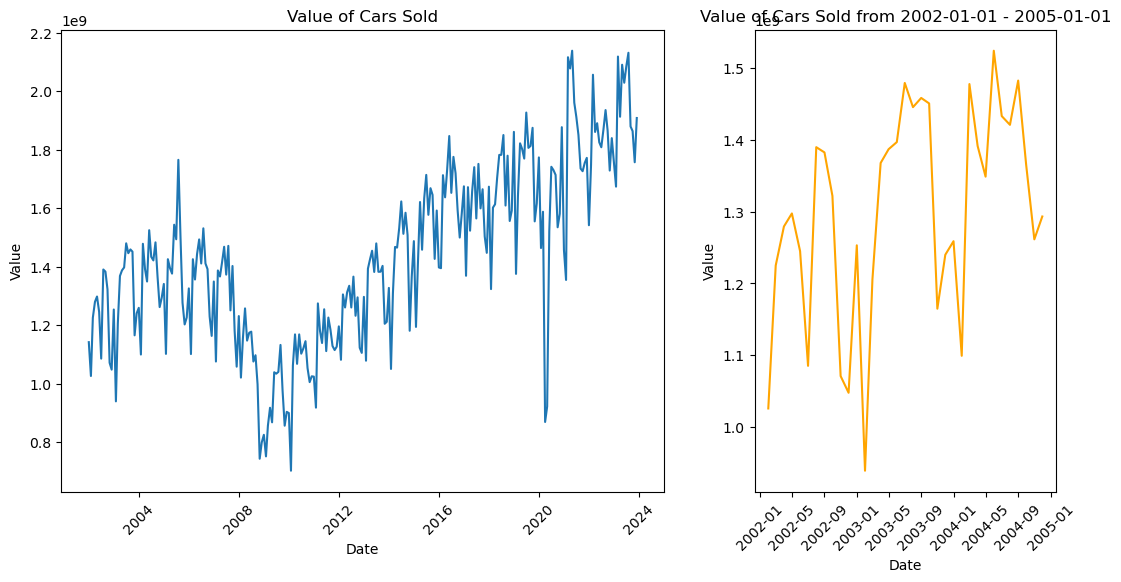

In [65]:
time_series_seasonal_analysis(value_cars_sold,
                              'total_value_cars_sold','Value of Cars Sold','2002-01-01','2005-01-01')

##### Initial Observations : Total Value Cars Sold 2002-2024 (left)
- Irregularities : The irregularities seem to take place at the same time as found in total cars sold. This is in the months following the outbreak of Covid-19 as well as a period of high growth in 2005.
- Seasonality : There does seem to be a strong seasonality with a common pattern in the high and low values within a year.
- Cyclical : There seems to be a linear trend following 2008 GFC with a small decline in 2020. The movement in 2002-2006 seems to be similar to total cars sold.
- Trend - There is a clear upward trend in value of cars sold - need to adjust for inflation.

##### Initial Observations : Total Value Cars Sold 2002-2005 (right)
- The seasonality seems to take place with a period of 12 which is a yearly basis there are repeating patterns.

#### Create Real Value of Cars Sold

In [66]:
# load in inflation data
inflation = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Automotive Industry/preprocessed_datasets/economic_datasets/inflation.csv')
inflation

date  cpiaucsl
0    2002-01-01   177.700
1    2002-02-01   178.000
2    2002-03-01   178.500
3    2002-04-01   179.300
4    2002-05-01   179.500
..          ...       ...
259  2023-08-01   306.187
260  2023-09-01   307.288
261  2023-10-01   307.531
262  2023-11-01   308.024
263  2023-12-01   308.742

[264 rows x 2 columns]

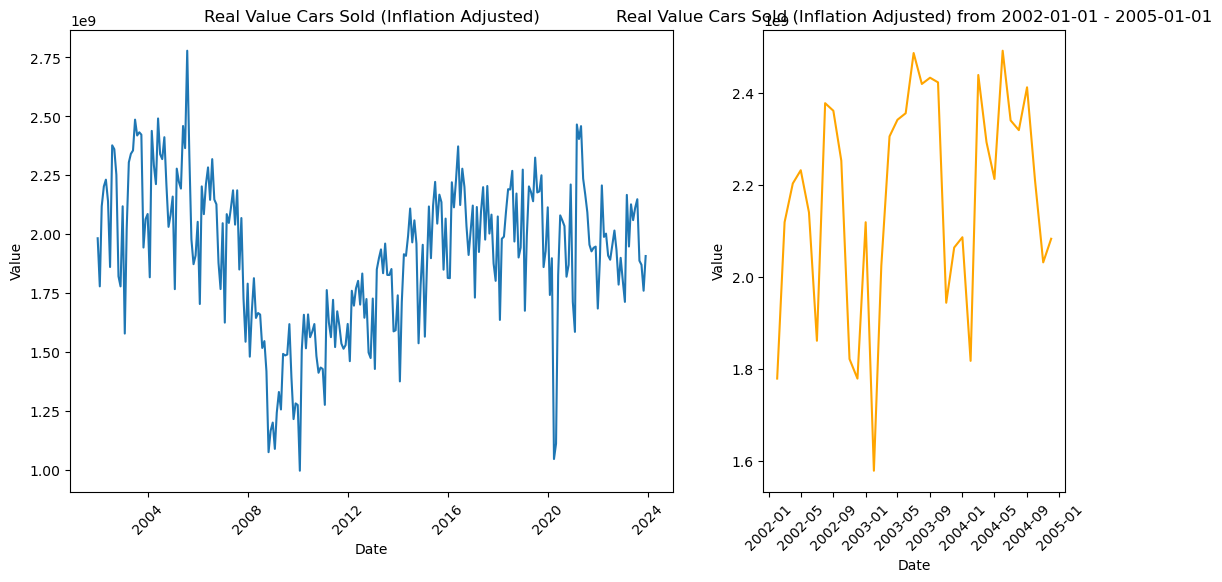

In [67]:
# get base year (2023-12-01 inflation)
cpi_base_year = inflation['cpiaucsl'].iloc[-1]

# create series of the real value of cars sold (adjusted for inflation)
total_real_value_cars_sold = value_cars_sold['total_value_cars_sold'].values * (cpi_base_year/inflation['cpiaucsl'].values)

# create data frame
real_value_cars_sold = pd.DataFrame({'real_value_cars_sold':total_real_value_cars_sold},index=total_cars_sold.index)

# make sure that real value cars sold dataframe has a ceiling
real_value_cars_sold = real_value_cars_sold.applymap(math.ceil)

# perform the time series analysis
time_series_seasonal_analysis(real_value_cars_sold,'real_value_cars_sold','Real Value Cars Sold (Inflation Adjusted)',
                              '2002-01-01','2005-01-01')

##### Initial Observations : Real Value Cars Sold 2002-2024 (left)
- Irregularities : The irregularities appear in 2005 August and April/May following 2020.

- Seasonality : Seasonality is clearly observed by the frequent spikes.

- Cyclical : Unlike total cars sold there does not seem to be a cyclical movement. It seems to be that there is a typical value of cars sold that is made up of total cars sold * price paid for that was impacted heavily by the 2008 GFC. While 2020 maintained at the level likely due to the price paid for the cars increasing (which will be investigated), 2008 did not have the same increase, suggesting that there is a more constant movement of money in Maryland to do with car sales.

- Trend : There is no clear trend.

##### Initial Observations : Real Value Cars Sold 2002-2005 (right)
- The seasonality seems to take place with a period of 12 which is a yearly basis there are repeating patterns.

Linear Regression
Slope: -18078.049032117262
Intercept: 1904961864.233768


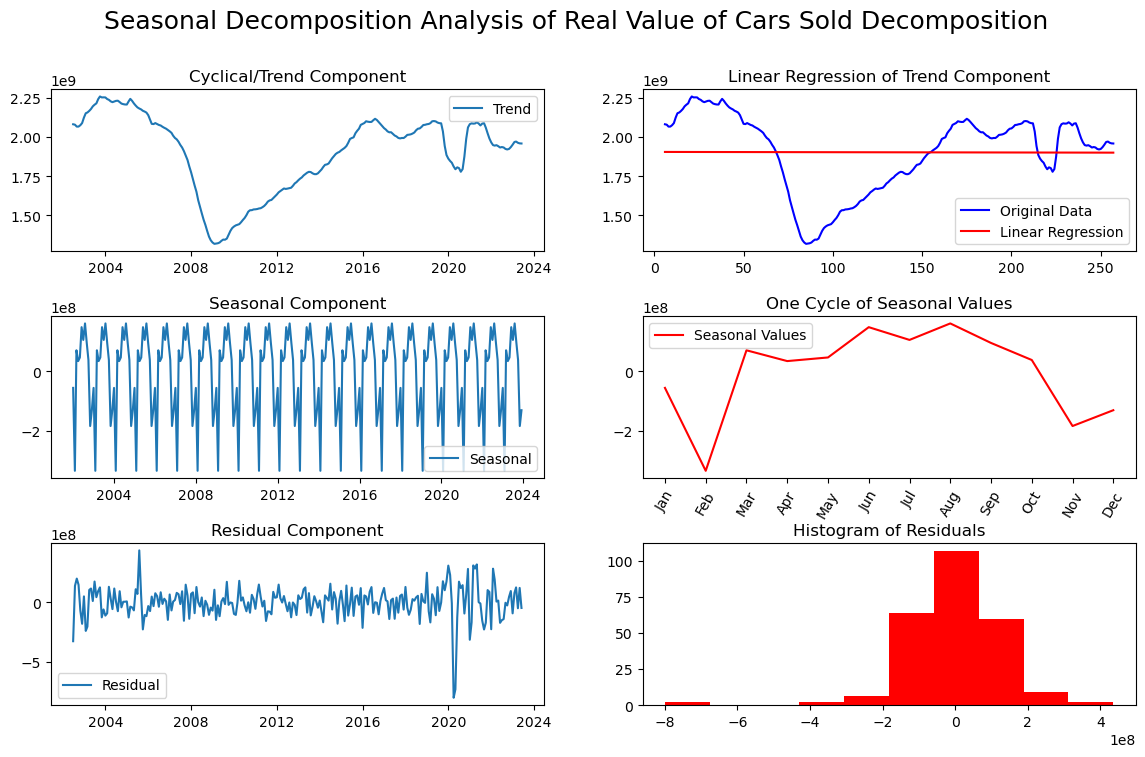

In [68]:
# perform the seasonal decomposition
seasonal_decomposition_analysis(real_value_cars_sold,'Real Value of Cars Sold Decomposition',12)

##### Observations from Initial Decomposition
- Cyclical/Trend Component (Top Left) : The moving average with a window of 12 shows a period of stagnent growth from 2002-2007 similar to total cars sold until 2008 when the GFC begins to impact economic conditions. There is a rise to 2016 however the value of cars sold (total cars sold * price paid for car) remains the same. During this time period total cars sold decreases which means that the average price paid for a car increases.

- Linear Regression (Top Right) : There is a slight decreasing slope however multiple linear trends would be better to represent the data. A movement in 2007, 2009, 2016

- Seasonal Component (Middle Left) : Seasonality that is added to the trend.

- One Cycle of Seasonal Values (Middle Right) : Similar to total cars sold the real value of cars sold is higher from March to October however there is a difference in the behvaior of January, which is far higher relative to total cars sold.

- Residual Component (Bottom Left) : The residual is quite constant until 2020 where there are irregularities that have been highlighted once again.

- Histogram of Residuals (Bottom Right) : The distribution of the residuals are normally distributed around a mean of 0 which shows strong signs that the data has been decomposed well.

### In-Depth Seasonal Decomposition
Utilising the knowledge gained above perform a full decomposition to understand the make up of the decomposition, this can hopefully be used to create a model of what has taken place.
1. Remove Irregularities
2. Find Seasonal Values
3. Model Cyclical Movement
4. Detrend Data

#### Irregularity Removal

In [69]:
# create wide data of value of cars sold
monthly_real_value_cars_sold = create_monthly_data(real_value_cars_sold,'real_value_cars_sold',np.arange(len(real_value_cars_sold)),'2002','2024')

# create z scores
zscore_monthly_value_cars_sold = (monthly_real_value_cars_sold - monthly_real_value_cars_sold.mean()) / monthly_real_value_cars_sold.std()
zscore_monthly_value_cars_sold[abs(zscore_monthly_value_cars_sold)>2.1] # a zscore of 2 was including too many 2.001 values

January  February     March     April       May June July    August  \
2002       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2003       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2004       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2005       NaN       NaN       NaN       NaN       NaN  NaN  NaN  2.218479   
2006       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2007       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2008       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2009 -2.250267       NaN -2.479766       NaN       NaN  NaN  NaN       NaN   
2010       NaN -2.494415       NaN       NaN       NaN  NaN  NaN       NaN   
2011       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2012       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2013       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2014       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2015       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2016       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2017       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2018       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2019       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2020       NaN       NaN       NaN -2.772359 -2.421714  NaN  NaN       NaN   
2021       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2022       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   
2023       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   

     September October  November December  
2002       NaN     NaN       NaN      NaN  
2003       NaN     NaN       NaN      NaN  
2004       NaN     NaN       NaN      NaN  
2005       NaN     NaN       NaN      NaN  
2006       NaN     NaN       NaN      NaN  
2007       NaN     NaN       NaN      NaN  
2008       NaN     NaN -2.576324 -2.21269  
2009       NaN     NaN       NaN      NaN  
2010       NaN     NaN       NaN      NaN  
2011       NaN     NaN       NaN      NaN  
2012       NaN     NaN       NaN      NaN  
2013       NaN     NaN       NaN      NaN  
2014       NaN     NaN       NaN      NaN  
2015       NaN     NaN       NaN      NaN  
2016       NaN     NaN       NaN      NaN  
2017       NaN     NaN       NaN      NaN  
2018       NaN     NaN       NaN      NaN  
2019       NaN     NaN       NaN      NaN  
2020       NaN     NaN       NaN      NaN  
2021       NaN     NaN       NaN      NaN  
2022       NaN     NaN       NaN      NaN  
2023       NaN     NaN       NaN      NaN

In [70]:
# create seasonal values
value_cars_seasonal_values = monthly_real_value_cars_sold.mean() - real_value_cars_sold['real_value_cars_sold'].mean()

# Remove irregularities
monthly_real_value_cars_sold_irr_removed, expected_values = remove_irregularities(
    monthly_real_value_cars_sold, 
    zscore_monthly_value_cars_sold, 
    value_cars_seasonal_values,
    2.1
)
monthly_real_value_cars_sold_irr_removed

Found: 2778720245 at (2005, August), Replacing with: 2355469343
Found: 1075996540 at (2008, November), Replacing with: 1352207335
Found: 1166547814 at (2008, December), Replacing with: 1409185983
Found: 1201457024 at (2009, January), Replacing with: 1288618901
Found: 1243464209 at (2009, March), Replacing with: 1413911018
Found: 997343643 at (2010, February), Replacing with: 1148432955
Found: 1047024034 at (2020, April), Replacing with: 1857740214
Found: 1112143624 at (2020, May), Replacing with: 1869814334


January    February       March       April         May        June  \
2002  1983276860  1779268812  2118906951  2203087599  2231843792  2140191945   
2003  2118872366  1579102705  2024077704  2305295273  2341432913  2355639538   
2004  2086267300  1817724633  2438718143  2292683189  2212844006  2491409005   
2005  2160157697  1767391275  2278604343  2222919211  2194098200  2459457141   
2006  2053083560  1704431789  2203290295  2085598363  2212108615  2283853406   
2007  2047125237  1625518130  2085588050  2048210997  2111544497  2186602664   
2008  1790779425  1481123619  1670488596  1813920076  1645344951  1666295733   
2009  1288618901  1089929714  1413911018  1331219900  1257140031  1492878184   
2010  1276324141  1148432955  1508093756  1658830332  1516611232  1660289494   
2011  1428911217  1276674965  1763537649  1625516161  1563761353  1722122502   
2012  1619915585  1461968165  1760550929  1697537239  1771179784  1802705459   
2013  1727623732  1428902665  1851173268  1898562389  1935971766  1835033629   
2014  1741260527  1376159831  1712437306  1915627402  1908797964  1993834868   
2015  1955691559  1565880619  1843979519  2118217853  1898767852  2121857713   
2016  1814923638  1814027515  2220736651  2114496546  2230695350  2372974879   
2017  2121955514  1731541025  2115881793  1925209361  2095986166  2200079518   
2018  2075769424  1636898687  1981157141  1990159184  2095701898  2191457924   
2019  2274413729  1675785309  1991092258  2203290489  2179622637  2140286780   
2020  2114495797  1742734429  1898503653  1857740214  1869814334  1827159355   
2021  1713358374  1586242303  2465846945  2404309996  2458909523  2236247372   
2022  1685143494  1897097069  2207398118  1989014316  2003047952  1909879643   
2023  1803524715  1713427486  2167230211  1948337198  2127143631  2060240273   

            July      August   September     October    November    December  
2002  1861377927  2377463807  2361012788  2252631873  1821726265  1779193278  
2003  2486433808  2419218817  2432781064  2422658874  1943972508  2063861029  
2004  2340039449  2318916421  2411921316  2210182132  2031655253  2082969137  
2005  2365579159  2355469343  2335467544  1979053821  1873409543  1910143083  
2006  2146271444  2318907701  2147532028  2127582744  1878803356  1767761262  
2007  2041103481  2186610107  1850766378  2069052143  1728820479  1544379879  
2008  1659725195  1517992721  1547164548  1418759578  1352207335  1409185983  
2009  1486309030  1490212444  1619085536  1393400419  1216359620  1282848768  
2010  1563667490  1587143987  1619395521  1483971342  1412787643  1434973047  
2011  1521729173  1673484098  1612631336  1536399434  1514685045  1530182865  
2012  1701883470  1833692706  1646193182  1725616781  1498495672  1475234734  
2013  1960808883  1827800217  1827479952  1852918658  1588326667  1593001997  
2014  2109458397  1965806461  2059303626  1960580672  1537930340  1784582107  
2015  2222421219  2045401117  2168343008  2136448884  1850027230  2066711516  
2016  2124311012  2278353845  2200878413  2034583924  1912461777  2013502516  
2017  1977602316  2204971516  2003252854  2083546015  1876166771  1802722142  
2018  2190075730  2269266394  1969436620  2173046132  1901732600  1943669202  
2019  2325303658  2177573551  2182038550  2250425968  1861084641  1929031992  
2020  2080363336  2059165652  2034977187  1820221263  1870358925  2211302737  
2021  2169857835  2093564316  1955961183  1927797187  1943021778  1947939475  
2022  1892343499  1954012613  2016064521  1933009787  1786674565  1900249749  
2023  2112795431  2148818539  1888005721  1870599863  1760750411  1907969542

Real value of cars sold is has now removed the irregular data where the z score was greater than 2.1, it has now been replaced with 

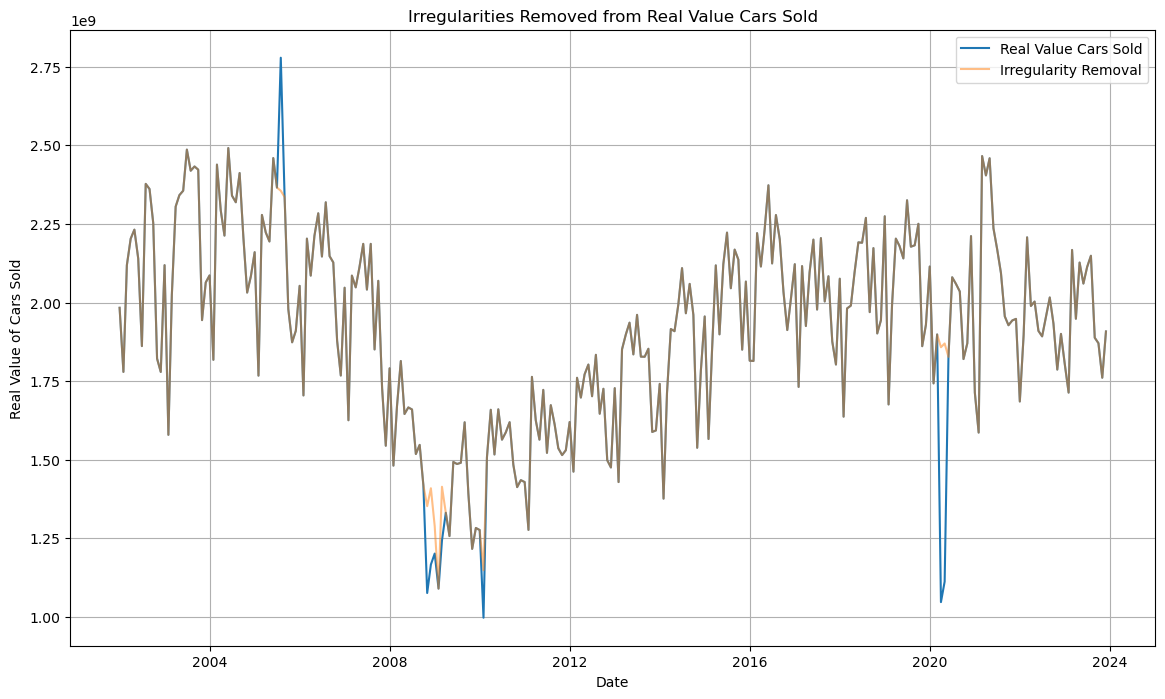

In [71]:
components_removed_value_cars_sold = convert_to_long_format(monthly_real_value_cars_sold_irr_removed,
                                                            '2002-01-01','2024-01-01',
                                                            'real_value_cars_sold_irr_removed','M')

# plot the two series comparison
plot_multiple_series_one_xvalues(total_cars_sold.index,
                                 [real_value_cars_sold['real_value_cars_sold'],components_removed_value_cars_sold['real_value_cars_sold_irr_removed']],
                                 ['Real Value Cars Sold','Irregularity Removal'],'Irregularities Removed from Real Value Cars Sold','Date',
                                 'Real Value of Cars Sold',[1,0.5])

The irregularities have been dropped, they took place in August of 2005, April/May 2020 and in the deepest part of the downturn from the GFC.

#### Seasonality Understanding
With the irregularities removed, a more accurate seasonal value can be found.

In [72]:
monthly_real_value_cars_sold_irr_removed.mean()

January      1.858250e+09
February     1.586376e+09
March        1.987327e+09
April        1.984081e+09
May          1.993744e+09
June         2.052295e+09
July         2.015430e+09
August       2.050175e+09
September    1.994986e+09
October      1.939204e+09
November     1.734612e+09
December     1.790064e+09
dtype: float64

In [73]:
# create new independent seasonal values
value_cars_seasonal_values_irr_removed = monthly_real_value_cars_sold_irr_removed.mean() - real_value_cars_sold['real_value_cars_sold'].mean()

# compare the new with the old seasonal value
((value_cars_seasonal_values_irr_removed - value_cars_seasonal_values) / value_cars_seasonal_values) * 100

January      -7.418391
February     -2.092621
March        10.777654
April        93.207940
May          66.730219
June          0.000000
July          0.000000
August      -11.896344
September     0.000000
October       0.000000
November     -6.763198
December     -8.572284
dtype: float64

The great difference was in April and May after the removal of the massive drop in value of cars sold due to the Covid-19 pandemic.

January     -5.729567e+07
February    -3.291697e+08
March        7.178212e+07
April        6.853571e+07
May          7.819867e+07
June         1.367500e+08
July         9.988470e+07
August       1.346295e+08
September    7.944069e+07
October      2.365863e+07
November    -1.809336e+08
December    -1.254810e+08
dtype: float64


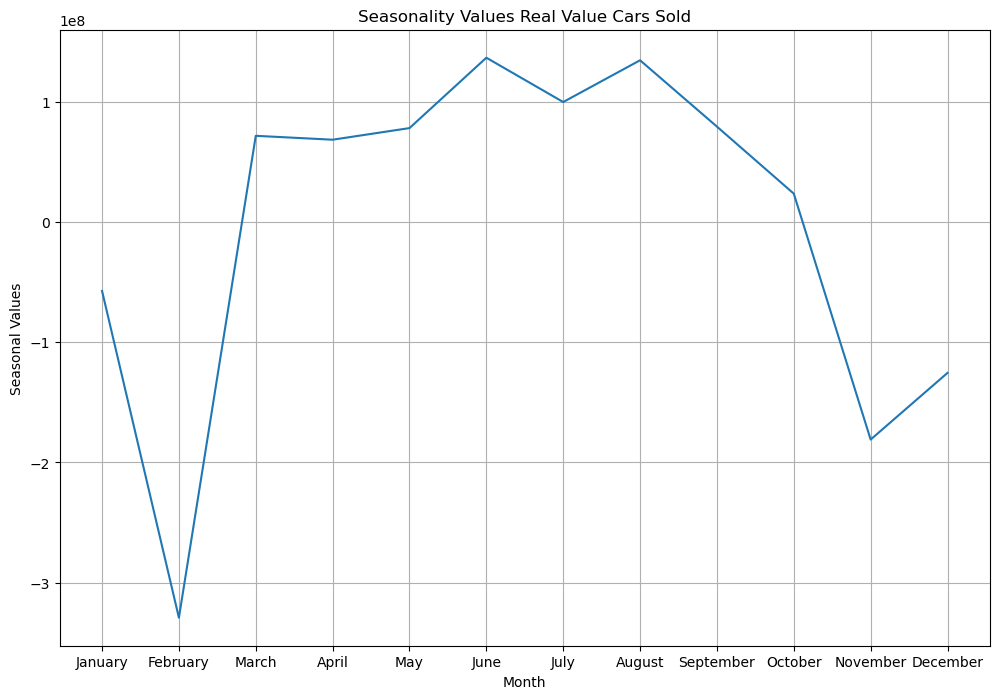

In [74]:
# change seasonal values to fit the new data with irregularities removed
value_cars_seasonal_values_irr_removed = monthly_real_value_cars_sold_irr_removed.mean() - components_removed_value_cars_sold['real_value_cars_sold_irr_removed'].mean()

print(value_cars_seasonal_values_irr_removed)

line_series(months,value_cars_seasonal_values_irr_removed,'Seasonality Values Real Value Cars Sold','Month','Seasonal Values',True)

The seasonal difference for February, November and December is far below average and March through October is above above which is similar to the seasonal values from total cars sold. However, the major difference is that January has a much higher value of cars sold than the rest. January is the beginning of the new year, why are the prices of cars paid for in January more expensive?

In [75]:
deseasonalize_series(components_removed_value_cars_sold,'date','real_value_cars_sold_irr_removed',value_cars_seasonal_values_irr_removed)

date  real_value_cars_sold_irr_removed  seasonal_value  \
0   2002-01-01                        1983276860   -5.729567e+07   
1   2002-02-01                        1779268812   -3.291697e+08   
2   2002-03-01                        2118906951    7.178212e+07   
3   2002-04-01                        2203087599    6.853571e+07   
4   2002-05-01                        2231843792    7.819867e+07   
..         ...                               ...             ...   
259 2023-08-01                        2148818539    1.346295e+08   
260 2023-09-01                        1888005721    7.944069e+07   
261 2023-10-01                        1870599863    2.365863e+07   
262 2023-11-01                        1760750411   -1.809336e+08   
263 2023-12-01                        1907969542   -1.254810e+08   

     deseasonalised_real_value_cars_sold_irr_removed  
0                                       2.040573e+09  
1                                       2.108439e+09  
2                                       2.047125e+09  
3                                       2.134552e+09  
4                                       2.153645e+09  
..                                               ...  
259                                     2.014189e+09  
260                                     1.808565e+09  
261                                     1.846941e+09  
262                                     1.941684e+09  
263                                     2.033451e+09  

[264 rows x 4 columns]

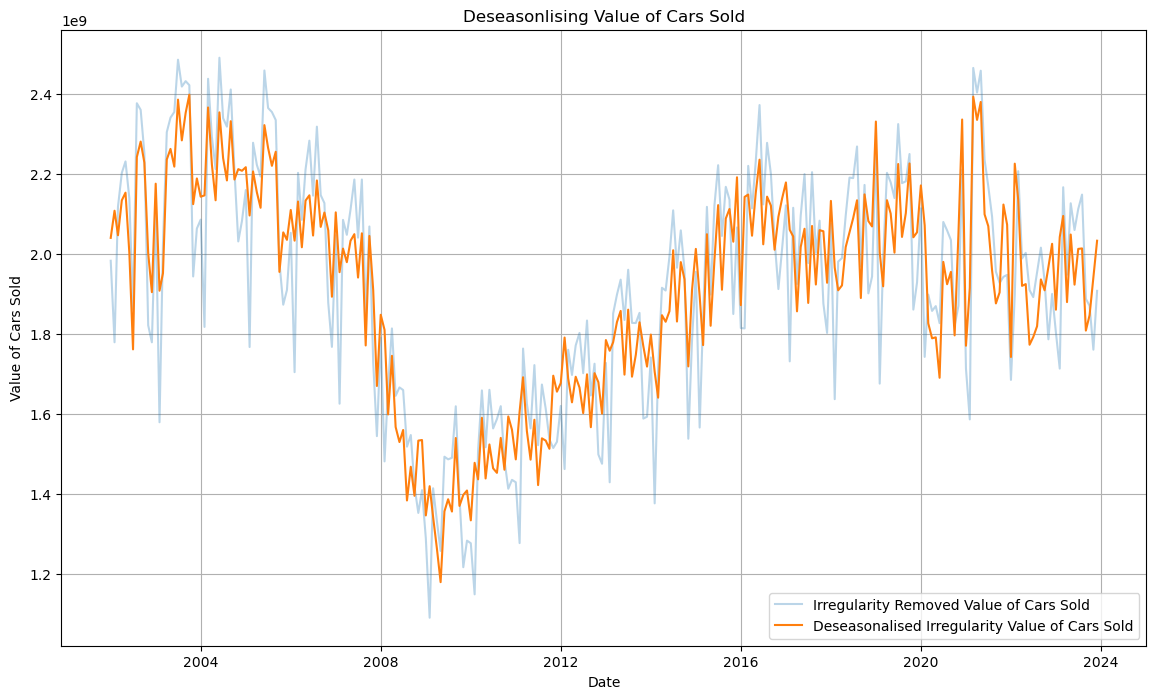

In [ ]:
# plot the deseasonalised data
plot_multiple_series_one_xvalues(components_removed_value_cars_sold['date'],
                                 [components_removed_value_cars_sold['real_value_cars_sold_irr_removed'],
                                  components_removed_value_cars_sold['deseasonalised_value_cars_sold']],
                                  ['Irregularity Removed Value of Cars Sold','Deseasonalised Irregularity Value of Cars Sold'],
                                  'Deseasonlising Value of Cars Sold','Date','Value of Cars Sold',[0.3,1])

##### Confidence Intervals of Seasonality

In [ ]:
# find the standard deviation
real_values_irr_removed_std = monthly_real_value_cars_sold_irr_removed.std()

# create upper seasonal value
value_sold_upper_seasonal_value = value_cars_seasonal_values_irr_removed + (1.96 * real_values_irr_removed_std)

# create lower seasonal value
value_sold_lower_seasonal_value = value_cars_seasonal_values_irr_removed - (1.96 * real_values_irr_removed_std)

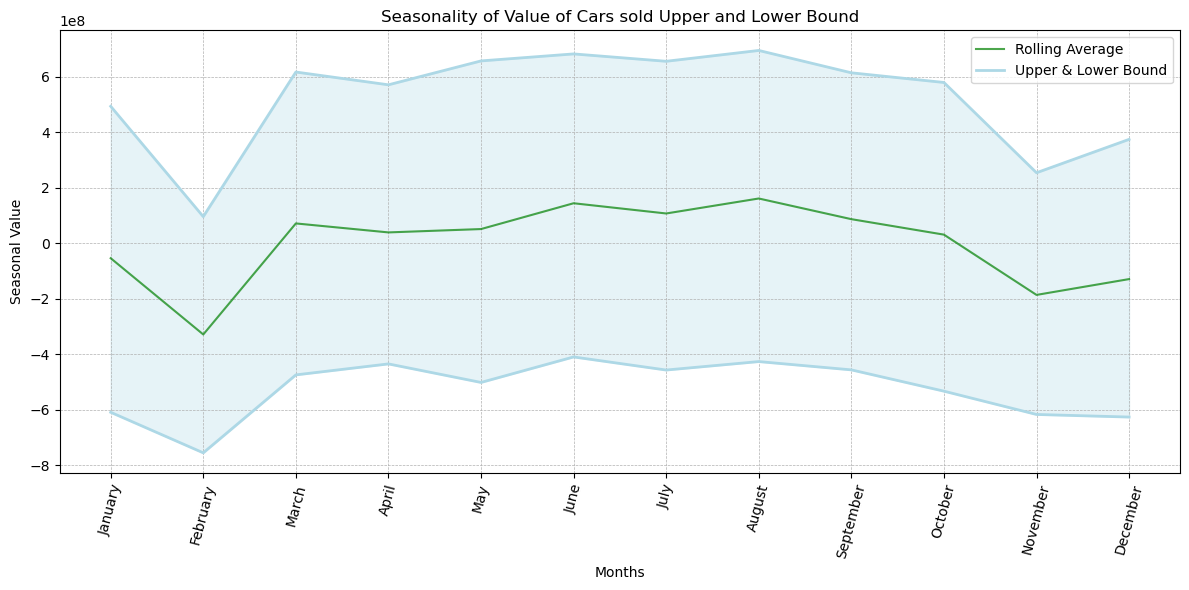

In [ ]:
# plot the confidence interval of seasonal values
plot_confidence_intervals(months,value_sold_upper_seasonal_value,value_sold_lower_seasonal_value,
                          'Seasonality of Value of Cars sold Upper and Lower Bound','Months','Seasonal Value',
                          value_cars_seasonal_values,False,True,False)

#### Cylical Understanding

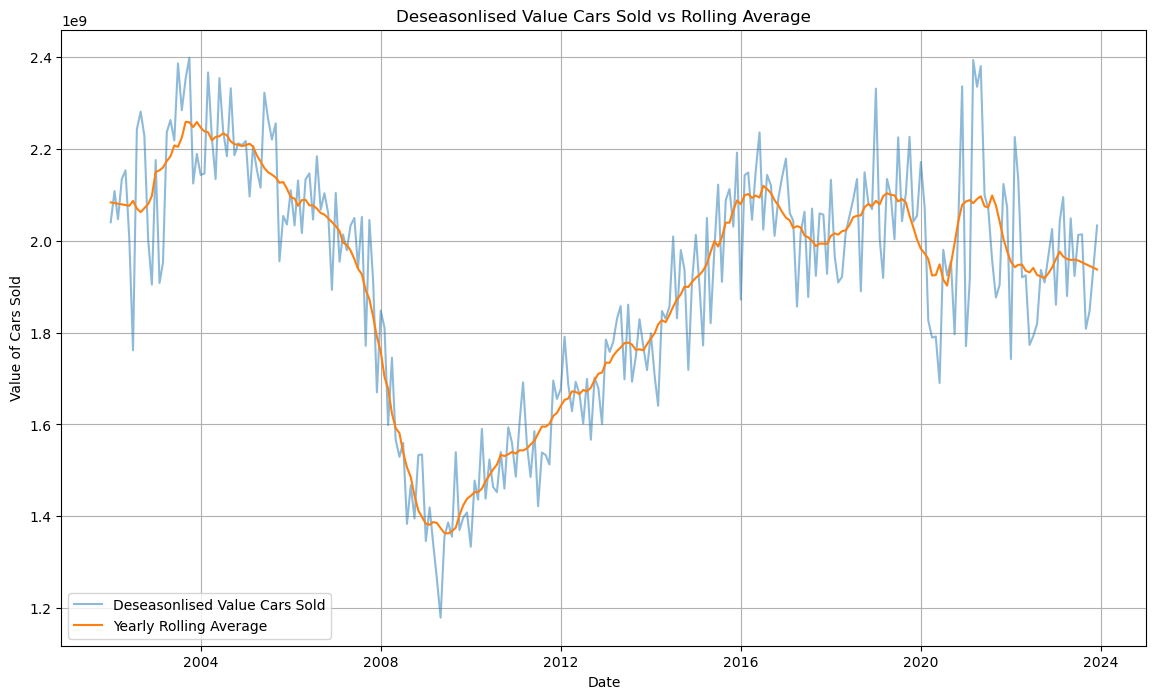

In [ ]:
# create rolling average of deseaosnlised data
value_cars_sold_rolling_average = savgol_smooth(components_removed_value_cars_sold['deseasonalised_value_cars_sold'],12,1)

# plot the rolling average against the deseasonalised data
plot_multiple_series_one_xvalues(total_cars_sold.index,
                                 [components_removed_value_cars_sold['deseasonalised_value_cars_sold'],value_cars_sold_rolling_average],
                                 ['deseasonalised Value Cars Sold','Yearly Rolling Average'],'deseasonalised Value Cars Sold vs Rolling Average',
                                 'Date','Value of Cars Sold',[0.5,1])

Unlike total cars sold, there is no cycle to the value of cars sold. There is however a value of cars sold that the recovery phase reaches in 2016 which is almost the same as when it dropped off following the Global Financial Crises. This was similar to total cars sold where it followed a sinusoidal model. The difference is that there is no drop in 2020 which means that the price of cars sold increased at a similar rate to which total cars sold decreased.

This could be due to 
- Supply Constraints
- Switch to more expensive cars
- Economic conditions
- Change in ratio between used and new cars sold

Before continuing a new set of explorations need to take place, this will be in chapter 3. Reference chapter 3 before returning to this part of the seasonal decomposition

## Seasonal Decomposition of New Value Cars Sold

In [98]:
new_value_cars_sold = car_sales[['date','real_new_value_cars_sold']].copy()
new_value_cars_sold['date'] = pd.to_datetime(new_value_cars_sold['date'])
new_value_cars_sold.set_index('date',inplace=True)
new_value_cars_sold

real_new_value_cars_sold
date                                
2002-01-01              1.311790e+09
2002-02-01              1.152500e+09
2002-03-01              1.393518e+09
2002-04-01              1.457387e+09
2002-05-01              1.470619e+09
...                              ...
2023-08-01              1.232784e+09
2023-09-01              1.139806e+09
2023-10-01              1.127101e+09
2023-11-01              1.064942e+09
2023-12-01              1.233235e+09

[264 rows x 1 columns]

#### Initial EDA
Perofrm initial analysis of new value cars sold
- Time Series Inspection
- Use Packages to Seasonally Decompose New Value Cars Sold

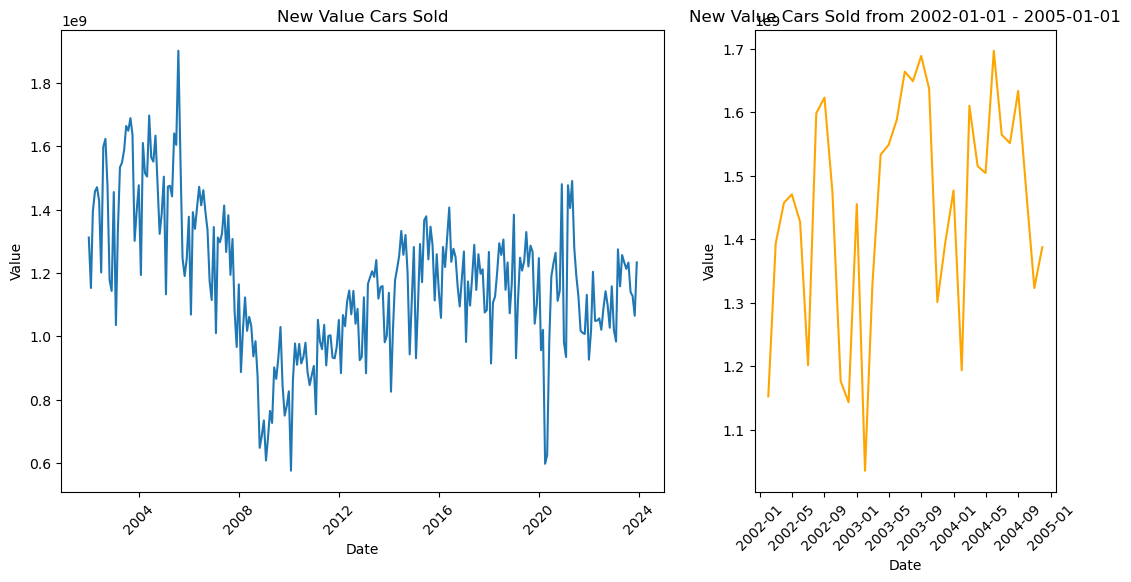

In [99]:
time_series_seasonal_analysis(new_value_cars_sold,'real_new_value_cars_sold','New Value Cars Sold','2002-01-01','2005-01-01')

In [100]:
# TODO continue new value cars sold seasonal decomposition
# then move into chapter 3 where you look at the movement of all of these different values determine the make up of the movement